# Project summary

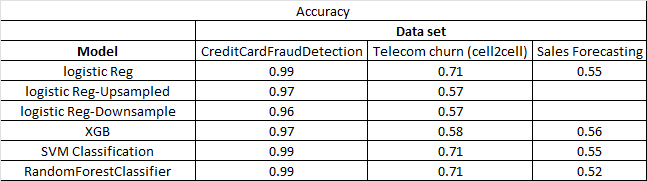

## Reign Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.manifold import TSNE
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import scipy
import scipy.stats
import matplotlib as mpl
from zipfile import ZipFile
from sklearn.metrics import accuracy_score


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

# HELPING FUNCTION

Kaggle
https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# you need Kaggle key for that!

confusion_matrix

In [3]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [4]:
# Find a single probabilty estimate using the mean value of variables in a trace
def find_probs(trace, data):
    
    # Find the means and std of the variables
    means_dict1, std_dict = evaluate_trace(trace, data)
          
    probs = []
       
    data = data[list(l_means_dict.keys())]
    mean_array = np.array(list(l_means_dict.values()))
    # Calculate the probability for each observation in the data
    for _, row in data.iterrows():
        # First the log odds
        logit = np.dot(row, mean_array)
        # Convert the log odds to a probability
        probability = 1 / (1 + np.exp(-logit))
        probs.append(probability)
        
    return probs 

tsne_plot

In [5]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
  

buildROC

In [6]:
from sklearn import metrics
def buildROC(y_test, y_pred):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')

LabelEncoder

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

# Data set description:


# CreditCardFraudDetection
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



Get The Directly From Kaggle

In [10]:

!kaggle datasets download -d mlg-ulb/creditcardfraud

100% 66.0M/66.0M [00:01<00:00, 65.7MB/s]



In [11]:
data = pd.read_csv('/content/creditcardfraud.zip') # Reading the file .csv
df = pd.DataFrame(data) # Converting data to Panda DataFrame
df2=df

In [12]:
df.describe() # Description of statistic features (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
# Check if there any Null Values!
df.isnull().sum().max()

0

In [15]:
# Normalization Amount
from sklearn.preprocessing import StandardScaler
df['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
df1=df

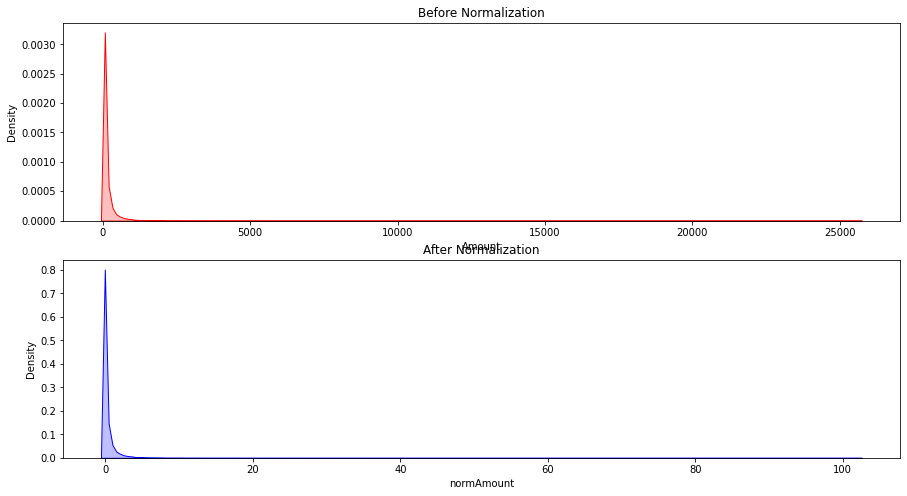

In [16]:
#make sure there are no change in distribution 
f, (ax1, ax2) = plt.subplots(2,1,figsize =( 15, 8))

sns.kdeplot(data['Amount'],shade=True, ax = ax1, color='red')
ax1.set_title('Before Normalization')

sns.kdeplot(data['normAmount'],shade=True, ax = ax2, color='blue')
ax2.set_title('After Normalization')

plt.show()

In [17]:
# Drop useless variables
df = df.drop(['Amount','Time'],axis=1)

In [18]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'normAmount'],
      dtype='object')

In [19]:
# The classes imbalanced.The problem here is Imbalanced Data set lead to biased to the majority class
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


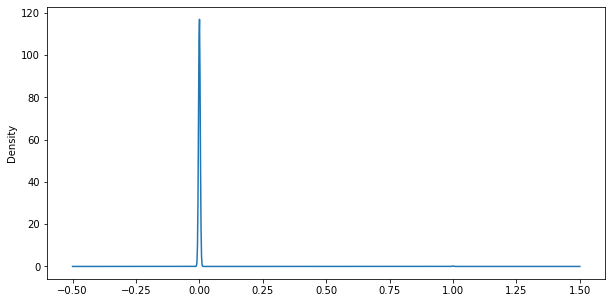

In [20]:
df['Class'].plot(kind="density", figsize=(10,5))

In [21]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Consider only 10000 rows of non fraud cases

In [22]:
non_fraud = df[df['Class'] == 0].sample(1000)
fraud = df[df['Class'] == 1]

df1 = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X = df1.drop(['Class'], axis = 1).values
Y = df1["Class"].values

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


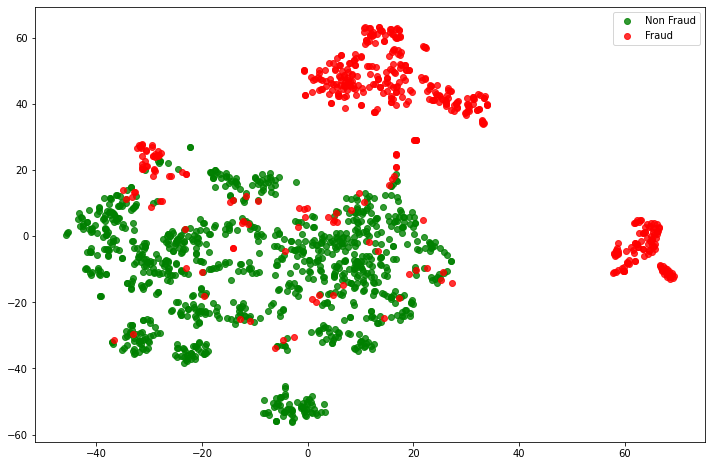

In [23]:
  
tsne_plot(X, Y, "original.png")

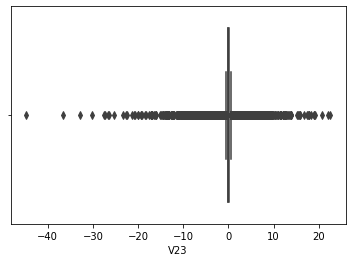

In [24]:
sns.boxplot(x=df['V23'])

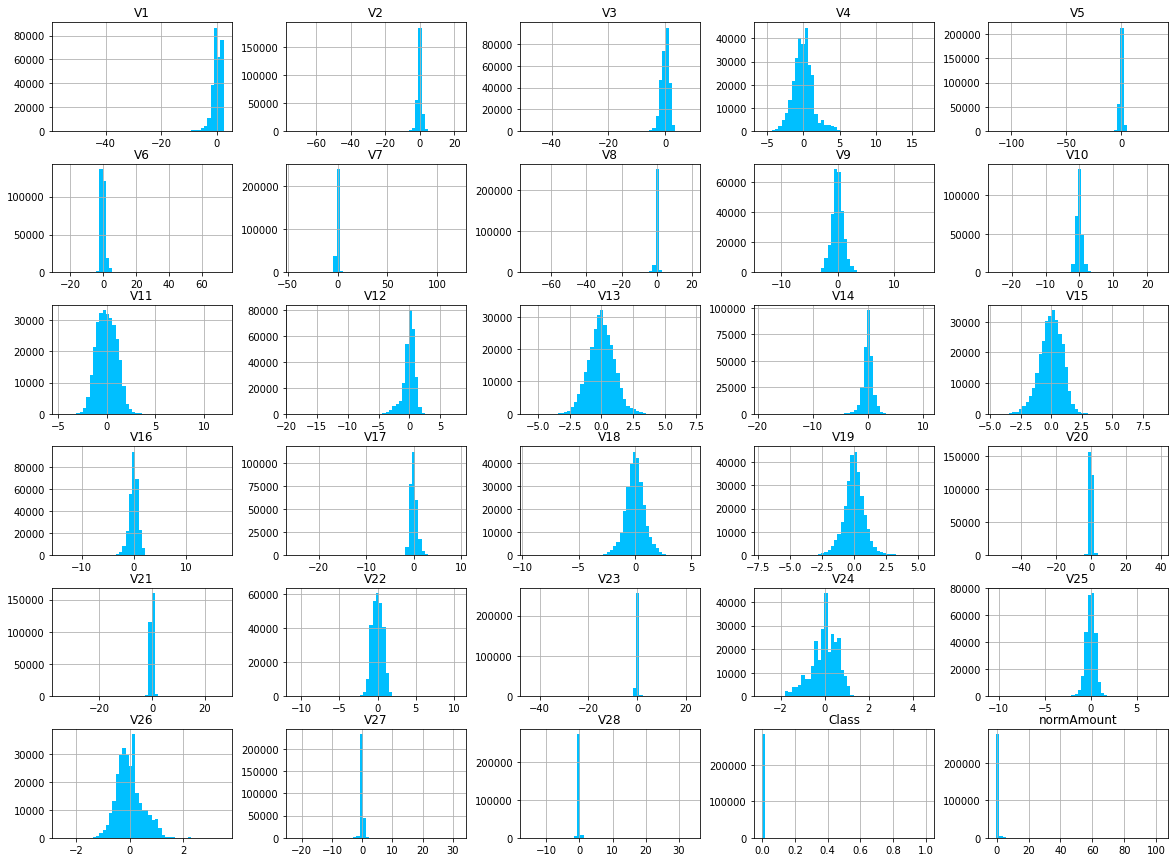

In [25]:
# Graph distribution
df.hist (bins=50, figsize=(20,15), color = 'deepskyblue')

plt.show()

In [26]:
#Create Train and Test Sets before dealing with imbalanced data
# Prepare data for modeling
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

# Train model logistic Reg in imbalanced data

In [45]:

lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

In [46]:
# Checking accuracy
accuracy_score(y_test, lr_pred)

0.9992275552122467

In [47]:
# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0    85336
1      107
Name: 0, dtype: int64

In [48]:
y_test.value_counts()

0    85294
1      149
Name: Class, dtype: int64

In [49]:
#f1_scor is a suitable measure of models tested with imbalance datasets
f1_score(y_test, predictions, average='macro')

0.8709003490740199

In [50]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, lr_pred))

,0,1
0,85282,12
1,54,95


In [51]:
accuracy_score(y_test, lr_pred, normalize=True)*100

99.92275552122467

as above high biased to the majoriy class

## Deal with imbalanced data by using Resampling Techniques







*   Oversampling Minority Class: Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don't have a ton of data to work with. A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.



In [52]:
from sklearn.utils import resample

In [53]:
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [54]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,Class
264873,-0.395578,1.489129,-0.833442,-0.224271,0.369444,-1.453886,0.796593,-0.060403,0.338270,-0.343885,-0.647990,-0.509490,-0.633729,-0.712156,0.765701,0.053830,0.526211,0.750505,-0.225921,0.054132,0.231624,0.955194,-0.172092,-0.041050,-0.313444,-0.174301,0.064657,-0.036960,-0.342275,0
163821,1.950487,0.002312,-1.761814,1.232470,0.523175,-0.650657,0.504231,-0.200857,0.116805,0.443750,0.257633,0.358875,-1.313311,0.922108,-1.078538,-0.395038,-0.437151,0.074223,0.187086,-0.285207,0.086306,0.326297,-0.068839,-0.416589,0.426044,-0.486299,-0.031266,-0.072543,-0.199543,0
72083,1.105167,-0.166253,0.569520,0.681043,-0.259189,0.642792,-0.437034,0.356746,0.441417,-0.113006,1.263824,1.017046,-0.791270,0.181033,-0.530067,-0.733662,0.436861,-0.903134,-0.242185,-0.226981,0.009073,0.293023,-0.028688,-0.242206,0.389813,0.482852,0.010705,-0.008399,-0.349231,0
196949,1.805238,0.961264,-1.717212,4.094625,0.938666,-0.227785,0.152911,0.066753,-1.073784,0.334537,1.016183,-0.510443,-0.748733,-2.708662,-1.014069,2.220866,1.285249,1.619087,-1.602343,-0.150818,-0.137875,-0.450959,0.098530,-0.662272,-0.150154,-0.098852,-0.000030,0.017622,-0.201742,0
126213,0.835421,-1.191847,0.578455,0.586101,-1.236663,0.194617,-0.532404,0.061561,-0.734344,0.754427,0.513247,0.704388,0.472193,-0.072043,-0.357247,-1.136932,-0.436168,2.047641,-0.775130,-0.045313,-0.072349,-0.109154,-0.308356,0.011968,0.461350,-0.244810,0.031845,0.060910,0.594317,0


In [55]:
X['Class'].value_counts()

0    213245
1       360
Name: Class, dtype: int64

In [56]:
# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

1    213245
0    213245
Name: Class, dtype: int64

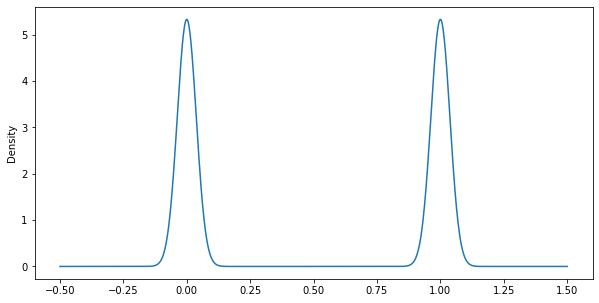

In [57]:
#plot the distribution after applying upsameling 
upsampled['Class'].plot(kind="density", figsize=(10,5))

trying logistic regression again with the balanced dataset

Upsampled

In [58]:

y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

In [59]:
# Checking accuracy
accuracy_score(y_test, upsampled_pred)

0.9778657902867897

In [60]:
# f1 score
f1_score(y_test, upsampled_pred)

0.12831858407079644

In [61]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, upsampled_pred))

,0,1
0,69510,1560
1,16,116


In [62]:
accuracy_score(y_test, upsampled_pred, normalize=True)*100

97.78657902867897

Our accuracy score decreased after upsampling, but the model is now predicting both classes more equally

In [63]:
recall_score(y_test, upsampled_pred)

0.8787878787878788

Downsample majority

In [64]:
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

1    360
0    360
Name: Class, dtype: int64

trying logistic regression again with the undersampled dataset

In [65]:


y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

In [66]:
# Checking accuracy
accuracy_score(y_test, undersampled_pred)

0.9637650627791354

In [67]:
# f1 score
f1_score(y_test, undersampled_pred)

0.08315565031982942

In [68]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, undersampled_pred))

,0,1
0,68505,2565
1,15,117


In [69]:
accuracy_score(y_test, undersampled_pred, normalize=True)*100

96.37650627791355

In [70]:
recall_score(y_test, undersampled_pred)

0.8863636363636364

Downsampling produced a higher recall score than upsampling! My concern here is the small number of total samples we used to train the model

# XGB - Grid Search CV to find best n_estimators (F1_score)

Finally Apply SMOTE or Synthetic Minority Oversampling Technique is a popular algorithm to creates sythetic observations of the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)


In [ ]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
accuracy_score(y_test, smote_pred)

0.9765877362995421

In [ ]:
# f1 score
f1_score(y_test, smote_pred)

0.12309310889005787

In [ ]:
recall_score(y_test, smote_pred)

0.8863636363636364

In [ ]:
# confustion matrix
pd.DataFrame(confusion_matrix(y_test, smote_pred))

,0,1
0,69418,1652
1,15,117


In [ ]:
import xgboost as xgb

In [ ]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_estimators': [50, 100]}

CV_xgb_cfl = GridSearchCV(estimator = xgb_cfl, param_grid = param_grid, scoring ='f1', verbose = 2)
CV_xgb_cfl.fit(X_train, y_train)

best_parameters = CV_xgb_cfl.best_params_
print("The best parameters for using this model is", best_parameters)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ....................................n_estimators=50; total time=  51.0s
[CV] END ....................................n_estimators=50; total time=  42.1s
[CV] END ....................................n_estimators=50; total time=  44.3s
[CV] END ....................................n_estimators=50; total time=  42.8s
[CV] END ....................................n_estimators=50; total time=  42.5s
[CV] END ...................................n_estimators=100; total time= 1.4min
[CV] END ...................................n_estimators=100; total time= 1.4min
[CV] END ...................................n_estimators=100; total time= 1.4min
[CV] END ...................................n_estimators=100; total time= 1.4min
[CV] END ...................................n_estimators=100; total time= 1.3min
The best parameters for using this model is {'n_estimators': 100}


In [ ]:
CV_xgb_cfl.cv_results_

{'mean_fit_time': array([44.41093016, 81.47349267]),
 'mean_score_time': array([0.14058652, 0.22045984]),
 'mean_test_score': array([0.96410537, 0.98372802]),
 'param_n_estimators': masked_array(data=[50, 100],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 50}, {'n_estimators': 100}],
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_test_score': array([0.96423311, 0.98409329]),
 'split1_test_score': array([0.96464906, 0.9839382 ]),
 'split2_test_score': array([0.96396752, 0.98335887]),
 'split3_test_score': array([0.96351429, 0.98390247]),
 'split4_test_score': array([0.96416284, 0.98334726]),
 'std_fit_time': array([3.32447494, 1.28214009]),
 'std_score_time': array([0.00341979, 0.00347509]),
 'std_test_score': array([0.00036976, 0.00031282])}

## XGB - With best hyperparameters

In [ ]:
# xgb
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,n_estimators = 100)

xgb_cfl.fit(X_train, y_train)

XGBClassifier(n_jobs=-1)

In [ ]:
X_train.shape,X_test.shape

((426490, 29), (71202, 29))

In [ ]:
y_pred = xgb_cfl.predict(X_test)

In [ ]:
y_score = xgb_cfl.predict_proba(X_test)[:,1]

In [ ]:
# f1 score
f1_score(y_test, y_pred)

0.22243528283796743

<Figure size 432x288 with 0 Axes>

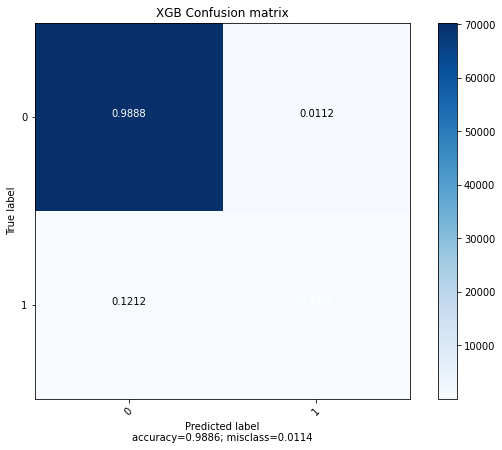

In [ ]:
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      target_names = class_names, 
                      title = 'XGB Confusion matrix')
plt.show()

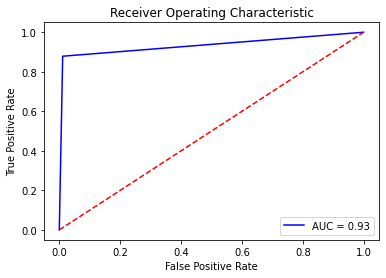

In [ ]:
buildROC(y_test, y_pred)

# PCA

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
PCA_ = PCA(n_components=15, svd_solver='full')
X_train = PCA_.fit_transform(X_train,y_train)
X_test = PCA_.transform(X_test)

# SVM Classification : sigmoid

In [27]:
from sklearn import svm
classifier = svm.SVC(kernel='linear') # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)

In [28]:
classifier.fit(X_train, y_train) # Then we train our model, with our balanced data train.

SVC(kernel='linear')

In [29]:
prediction_SVM_all = classifier.predict(X_test) #And finally, we predict our data test.

In [30]:
accuracy_score(y_test, prediction_SVM_all)

0.9994850368081645

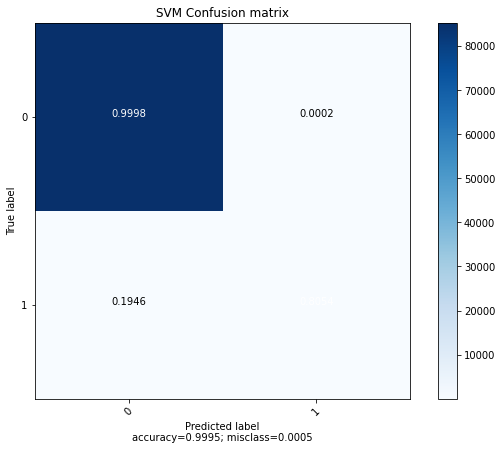

In [31]:
cm = confusion_matrix(y_test, prediction_SVM_all)
class_names = [0,1]
plot_confusion_matrix(cm, 
                      target_names = class_names, 
                      title = 'SVM Confusion matrix')

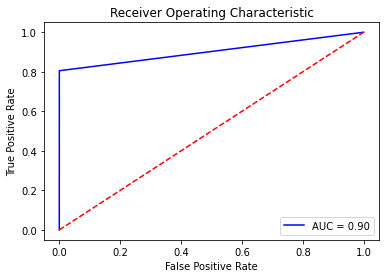

In [32]:
buildROC(y_test, prediction_SVM_all)

# RandomForestClassifier

In [76]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

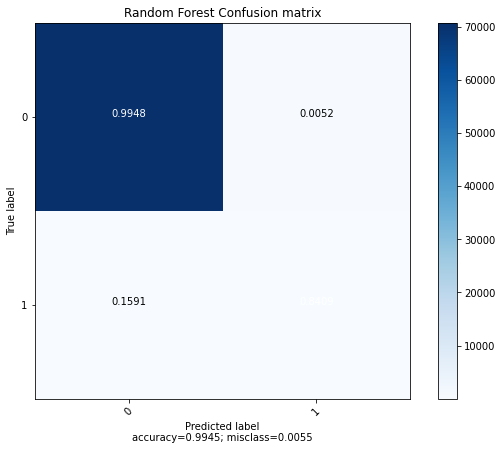

In [77]:
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plot_confusion_matrix(cm, 
                      target_names = class_names, 
                      title = 'Random Forest Confusion matrix')

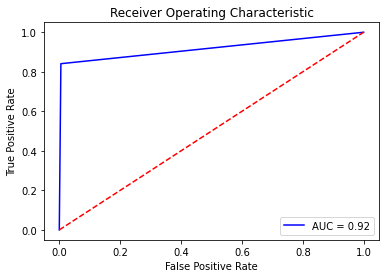

In [78]:
buildROC(y_test, y_pred)

In [80]:
accuracy_score(y_test, y_pred)

0.9945085812196287

# Markov Chain Monte Metropolis Hastings

In [81]:

#Defines whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))


def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,iterations,data,acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    x = param_init
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_model(x)    
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data) 
        if (acceptance_rule(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)

In [82]:
#The tranistion model defines how to move from sigma_current to sigma_new
transition_model = lambda x: np.random.normal(x,[0.05,5],(2,))
mu_obs=X_train.V23.mean()

import math
def prior(w):
    if(w[0]<=0 or w[1] <=0):
        return 0
    else:
        return 1
    
def manual_log_lik_gamma(x,data):
    return np.sum((x[0]-1)*np.log(data) - (1/x[1])*data - x[0]*np.log(x[1]) - np.log(math.gamma(x[0])))
    
def log_lik_gamma(x,data):
    return np.sum(np.log(scipy.stats.gamma(a=x[0],scale=x[1],loc=0).pdf(data)))  

In [83]:
accepted, rejected = metropolis_hastings(manual_log_lik_gamma,prior,transition_model,[4, 10], 50000,X_train.V23,acceptance)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


In [84]:
print(accepted.shape)

(303, 2)


Starting from a=4, and b =10, the algorithm accepted 74 pairs of samples

Text(0.5, 1.0, 'Figure 12: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. Last 50 samples are shown.')

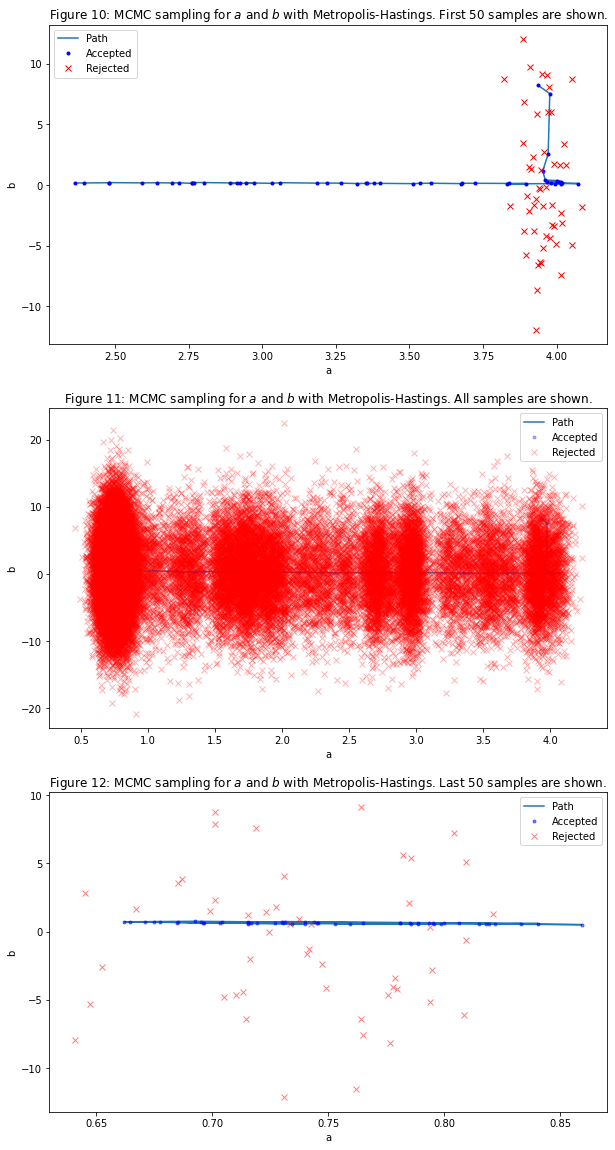

In [85]:
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(3,1,1)
ax.plot(accepted[:50,0], accepted[:50,1], label="Path")
ax.plot(accepted[:50,0], accepted[:50,1], 'b.', label='Accepted')
ax.plot(rejected[:50,0], rejected[:50,1], 'rx', label='Rejected')
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure 10: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. First 50 samples are shown.")  


ax = fig.add_subplot(3,1,2)
ax.plot(accepted[:,0], accepted[:,1], label="Path")
ax.plot(accepted[:,0], accepted[:,1], 'b.', label='Accepted',alpha=0.3)
ax.plot(rejected[:,0], rejected[:,1], 'rx', label='Rejected',alpha=0.3)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure 11: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. All samples are shown.") 

to_show=50
ax = fig.add_subplot(3,1,3)
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], label="Path")
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax.plot(rejected[-to_show:,0], rejected[-to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure 12: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. Last 50 samples are shown.") 

Run the algorithm with initial parameters and collect accepted and rejected samples

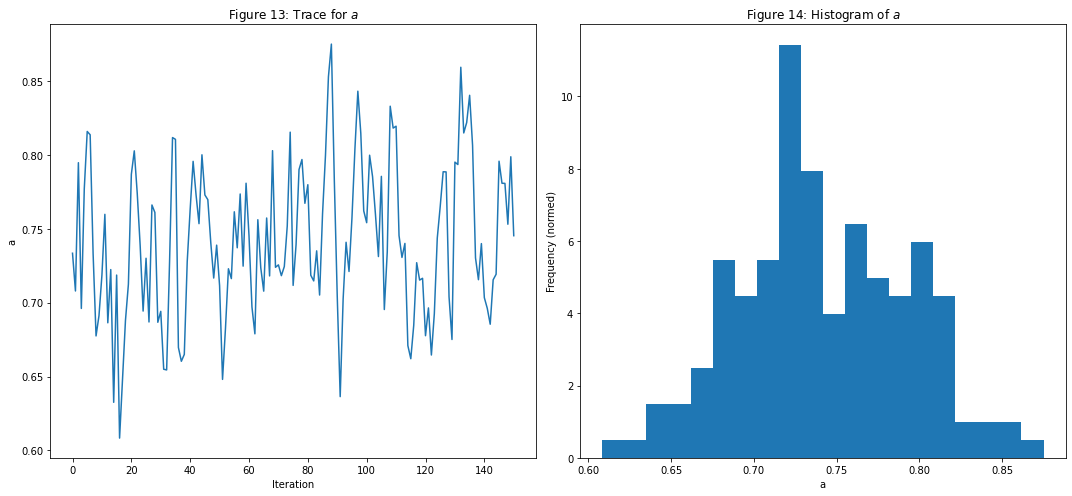

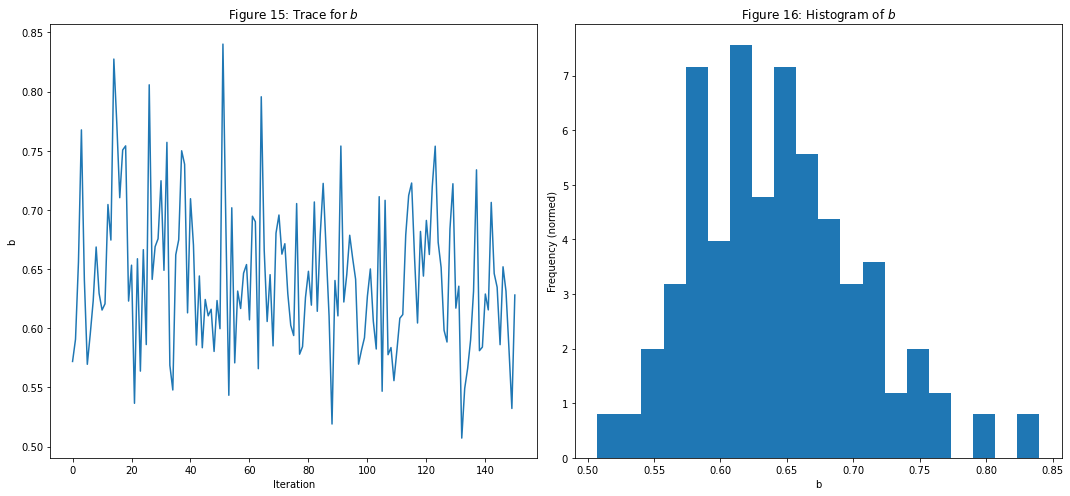

In [86]:
show=int(-0.5*accepted.shape[0])
hist_show=int(-0.50*accepted.shape[0])


fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,0])
ax.set_title("Figure 13: Trace for $a$")
ax.set_xlabel("Iteration")
ax.set_ylabel("a")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,0], bins=20, density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("a")
ax.set_title("Figure 14: Histogram of $a$")
fig.tight_layout()

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1])
ax.set_title("Figure 15: Trace for $b$")
ax.set_xlabel("Iteration")
ax.set_ylabel("b")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,1], bins=20, density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("b")
ax.set_title("Figure 16: Histogram of $b$")
fig.tight_layout()


### Prediction time
First, we average the last 50% of accepted samples of a and b, and we generate random individuals from a Γ distribution

0.7416271473003782 0.6434167188361818


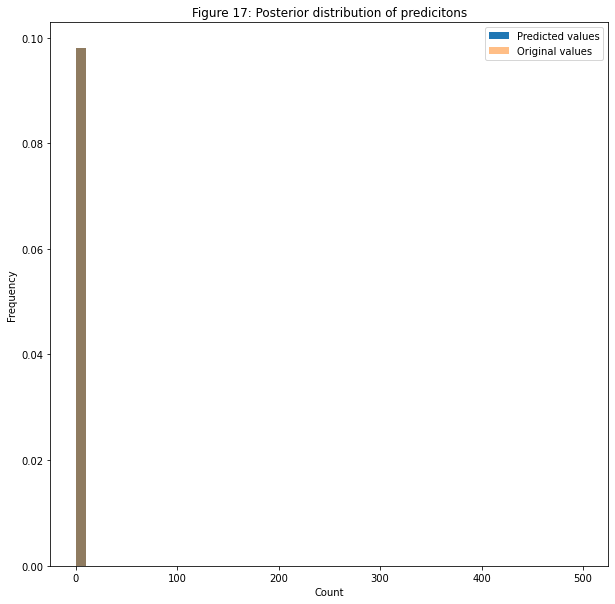

In [87]:
show=-int(0.5*accepted.shape[0])

mu=accepted[show:,0].mean()
sigma=accepted[show:,1].mean()
print(mu, sigma)
model = lambda t,mu,sigma:np.random.gamma(mu,sigma,t)
t=np.arange(X_train.V23.shape[0])
observation_gen=model(t.shape[0],mu,sigma)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)



ax.hist( observation_gen,bins=np.linspace(0,500,50) ,density=True,label="Predicted values")
ax.hist( X_train.V23,bins=np.linspace(0,500,50) ,alpha=0.5,density=True, label="Original values")
ax.set_xlabel("Count")
ax.set_ylabel("Frequency")
ax.set_title("Figure 17: Posterior distribution of predicitons")
ax.legend()

0.7416271473003782 0.6434167188361818


[(-0.1, 1.0), Text(0, 0.5, 'autocorrelation'), Text(0.5, 0, 'lag')]

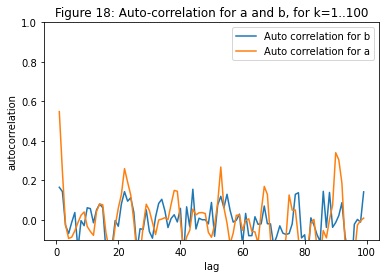

In [97]:
mean_acc_0=accepted[show:,0].mean()
mean_acc_1=accepted[show:,1].mean()
print(mean_acc_0,mean_acc_1)

lag=np.arange(1,100)
def autocorr(accepted,lag):
    num_0=0
    denom_0=0
    num_1=0
    denom_1=0
    for i in range(accepted.shape[0]-lag):
        num_0+=(accepted[i,0]-mean_acc_0)*(accepted[i+lag,0]-mean_acc_0)
        num_1+=(accepted[i,1]-mean_acc_1)*(accepted[i+lag,1]-mean_acc_1)
        denom_0+=(mean_acc_0-accepted[i,0])**2
        denom_1+=(mean_acc_1-accepted[i,1])**2
    rk_0=num_0/denom_0
    rk_1=num_1/denom_1
    return rk_0, rk_1


accepted_reversed=accepted[show:,:]
result=np.zeros((2,lag.shape[0]))
#print(lag)
for l in lag:
    result[:,l-1]=autocorr(accepted_reversed,l)

    ###Instead of writing an autocorrelation function, one could simply use thee autocorr function provided in pymc3    
#from pymc3.stats import autocorr

fig, ax = plt.subplots()
#ax.plot(lag, [autocorr(accepted[show:,1], l) for l in lags], label='auto b')
#ax.plot(lag, [autocorr(accepted[show:,0], l) for l in lags], label='auto a')
ax.plot(lag, result[1,:], label='Auto correlation for b')
ax.plot(lag, result[0,:], label='Auto correlation for a')
ax.legend(loc=0)
ax.set_title("Figure 18: Auto-correlation for a and b, for k=1..100")
ax.set(xlabel='lag', ylabel='autocorrelation', ylim=(-.1, 1))

# Telecom churn (cell2cell)

In [40]:
!kaggle datasets download -d jpacse/datasets-for-churn-telecom

datasets-for-churn-telecom.zip: Skipping, found more recently modified local copy (use --force to force download)


In [41]:
with ZipFile('/content/datasets-for-churn-telecom.zip', 'r') as images_indus_hospital:
  images_indus_hospital.extractall()

In [42]:
train = pd.read_csv("/content/cell2celltrain.csv")
test = pd.read_csv("/content/cell2cellholdout.csv")

In [43]:
train.info()
train[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
5,3000030,No,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,9.0,1.7,13.0,0.7,0.0,42.2,6.7,0.0,33.3,53.0,10.7,0.0,0.7,53,1,1,OKCTUL918,3.0,2.0,231.0,28.0,0.0,No,No,Yes,No,No,Known,No,No,No,Yes,No,Yes,0,0,Yes,No,0,1,No,1,30,No,3-Good,Other,Other,Yes
6,3000038,No,31.66,26.0,30.0,0.25,0.0,0.0,60.0,4.0,0.0,1.0,2.3,0.0,0.0,0.0,0.0,0.0,1.7,1.7,1.0,0.0,0.0,57,2,2,OKCTUL918,2.0,2.0,601.0,52.0,58.0,No,No,Yes,No,No,Known,Yes,Yes,No,Yes,No,Yes,0,0,No,Yes,0,9,No,1,30,No,1-Highest,Other,Self,Yes
7,3000042,No,62.13,98.0,66.0,2.48,0.0,0.0,24.0,6.8,0.0,0.3,4.0,4.0,0.0,0.0,3.7,0.0,7.7,7.3,0.3,0.0,0.0,59,2,2,OKCOKC405,3.0,3.0,464.0,46.0,46.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,30,No,1-Highest,Other,Professional,No
8,3000046,No,35.30,24.0,35.0,0.00,0.0,0.0,20.0,-0.3,0.0,0.0,1.0,0.0,0.0,2.4,4.0,1.7,9.3,1.7,0.0,0.0,0.0,53,3,3,SANMCA210,4.0,3.0,544.0,36.0,34.0,Yes,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,Yes,No,0,9,No,0,80,No,1-Highest,Other,Other,Yes
9,3000050,No,81.00,1056.0,75.0,0.00,0.0,0.0,43.0,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,1,1,PITHOM412,9.0,5.0,388.0,46.0,68.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,5,No,1,30,No,3-Good,Other,Professional,No


In [44]:
#Churn : Yes:1 , No:0
Churn = {'Yes': 1,'No': 0} 
  
# traversing through dataframe 
# values where key matches 
train.Churn = [Churn[item] for item in train.Churn] 
print(train)

       CustomerID  Churn  MonthlyRevenue  ...  PrizmCode    Occupation  MaritalStatus
0         3000002      1           24.00  ...   Suburban  Professional             No
1         3000010      1           16.99  ...   Suburban  Professional            Yes
2         3000014      0           38.00  ...       Town        Crafts            Yes
3         3000022      0           82.28  ...      Other         Other             No
4         3000026      1           17.14  ...      Other  Professional            Yes
...           ...    ...             ...  ...        ...           ...            ...
51042     3399958      1             NaN  ...   Suburban         Other            Yes
51043     3399974      0           95.17  ...      Other         Other             No
51044     3399978      1             NaN  ...      Other      Clerical             No
51045     3399990      0             NaN  ...      Other         Other             No
51046     3399994      0             NaN  ...      Oth

## Handling missing data

In [45]:
print("Any missing sample in training set:",train.isnull().values.any())
print("Any missing sample in test set:",test.isnull().values.any(), "\n")

Any missing sample in training set: True
Any missing sample in test set: True 



Here we handling missing value filled by zero rather than dropping NA values. Another technique of handling missing value in addition to filled by a single number like zero, or it might be some sort of imputation or interpolation from the good values. You could do this in-place using the isnull() method as a mask, but because it is such a common operation Pandas provides the fillna() method, which returns a copy of the array with the null values replaced.

In [46]:
# for column
#train['MonthlyRevenue'].fillna((train['MonthlyRevenue'].median()), inplace=True)
# for column
train['MonthlyRevenue'] = train['MonthlyRevenue'].replace(np.nan, 0)

# for whole dataframe
train = train.replace(np.nan, 0)

# inplace
train.replace(np.nan, 0, inplace=True)

print(train)

       CustomerID  Churn  MonthlyRevenue  ...  PrizmCode    Occupation  MaritalStatus
0         3000002      1           24.00  ...   Suburban  Professional             No
1         3000010      1           16.99  ...   Suburban  Professional            Yes
2         3000014      0           38.00  ...       Town        Crafts            Yes
3         3000022      0           82.28  ...      Other         Other             No
4         3000026      1           17.14  ...      Other  Professional            Yes
...           ...    ...             ...  ...        ...           ...            ...
51042     3399958      1            0.00  ...   Suburban         Other            Yes
51043     3399974      0           95.17  ...      Other         Other             No
51044     3399978      1            0.00  ...      Other      Clerical             No
51045     3399990      0            0.00  ...      Other         Other             No
51046     3399994      0            0.00  ...      Oth

In [47]:
# for column
#train['MonthlyMinutes'].fillna((train['MonthlyMinutes'].median()), inplace=True)
train['MonthlyMinutes'] = train['MonthlyMinutes'].replace(np.nan, 0)

# for whole dataframe
train = train.replace(np.nan, 0)

# inplace
train.replace(np.nan, 0, inplace=True)

print(train)

       CustomerID  Churn  MonthlyRevenue  ...  PrizmCode    Occupation  MaritalStatus
0         3000002      1           24.00  ...   Suburban  Professional             No
1         3000010      1           16.99  ...   Suburban  Professional            Yes
2         3000014      0           38.00  ...       Town        Crafts            Yes
3         3000022      0           82.28  ...      Other         Other             No
4         3000026      1           17.14  ...      Other  Professional            Yes
...           ...    ...             ...  ...        ...           ...            ...
51042     3399958      1            0.00  ...   Suburban         Other            Yes
51043     3399974      0           95.17  ...      Other         Other             No
51044     3399978      1            0.00  ...      Other      Clerical             No
51045     3399990      0            0.00  ...      Other         Other             No
51046     3399994      0            0.00  ...      Oth

In [48]:
# for column
#train['TotalRecurringCharge'].fillna((train['TotalRecurringCharge'].median()), inplace=True)
train['TotalRecurringCharge'] = train['TotalRecurringCharge'].replace(np.nan, 0)

# for whole dataframe
train = train.replace(np.nan, 0)

# inplace
train.replace(np.nan, 0, inplace=True)

print(train)

       CustomerID  Churn  MonthlyRevenue  ...  PrizmCode    Occupation  MaritalStatus
0         3000002      1           24.00  ...   Suburban  Professional             No
1         3000010      1           16.99  ...   Suburban  Professional            Yes
2         3000014      0           38.00  ...       Town        Crafts            Yes
3         3000022      0           82.28  ...      Other         Other             No
4         3000026      1           17.14  ...      Other  Professional            Yes
...           ...    ...             ...  ...        ...           ...            ...
51042     3399958      1            0.00  ...   Suburban         Other            Yes
51043     3399974      0           95.17  ...      Other         Other             No
51044     3399978      1            0.00  ...      Other      Clerical             No
51045     3399990      0            0.00  ...      Other         Other             No
51046     3399994      0            0.00  ...      Oth

In [49]:
# for column
#train['DirectorAssistedCalls'].fillna((train['DirectorAssistedCalls'].median()), inplace=True)
train['DirectorAssistedCalls'] = train['DirectorAssistedCalls'].replace(np.nan, 0)

# for whole dataframe
train = train.replace(np.nan, 0)

# inplace
train.replace(np.nan, 0, inplace=True)

print(train)

       CustomerID  Churn  MonthlyRevenue  ...  PrizmCode    Occupation  MaritalStatus
0         3000002      1           24.00  ...   Suburban  Professional             No
1         3000010      1           16.99  ...   Suburban  Professional            Yes
2         3000014      0           38.00  ...       Town        Crafts            Yes
3         3000022      0           82.28  ...      Other         Other             No
4         3000026      1           17.14  ...      Other  Professional            Yes
...           ...    ...             ...  ...        ...           ...            ...
51042     3399958      1            0.00  ...   Suburban         Other            Yes
51043     3399974      0           95.17  ...      Other         Other             No
51044     3399978      1            0.00  ...      Other      Clerical             No
51045     3399990      0            0.00  ...      Other         Other             No
51046     3399994      0            0.00  ...      Oth

In [50]:
train = FunLabelEncoder(train)
train.info()
train.iloc[235:300,:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  int64  
 2   MonthlyRevenue             51047 non-null  float64
 3   MonthlyMinutes             51047 non-null  float64
 4   TotalRecurringCharge       51047 non-null  float64
 5   DirectorAssistedCalls      51047 non-null  float64
 6   OverageMinutes             51047 non-null  float64
 7   RoamingCalls               51047 non-null  float64
 8   PercChangeMinutes          51047 non-null  float64
 9   PercChangeRevenues         51047 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
235,3001782,1,64.80,479.0,50.0,0.00,139.0,0.0,-337.0,-13.3,0.7,2.3,23.7,1.0,0.0,107.3,14.7,4.0,81.0,29.3,3.0,0.0,1.0,47,1,1,242,2.0,1.0,172.0,58.0,58.0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,3,0,0,8,0,0,2,4,2
236,3001786,1,17.14,3.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.3,0.0,0.0,0.0,0.0,47,1,1,359,1.0,1.0,1444.0,56.0,54.0,0,0,0,1,1,0,1,1,0,1,1,1,0,0,0,1,0,9,0,0,15,0,0,2,3,2
237,3001790,0,124.06,2955.0,82.0,0.00,421.0,0.0,262.0,20.0,23.0,31.7,104.7,0.0,0.3,1084.4,126.0,43.3,1116.0,197.7,54.7,0.0,69.0,52,2,2,336,11.0,7.0,195.0,0.0,0.0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,14,0,0,2,3,1
238,3001794,0,80.28,1245.0,68.0,1.24,73.0,0.0,-160.0,-62.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,2,1,330,8.0,4.0,285.0,40.0,44.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,0,3,0,0,2,0,4,2
239,3001802,0,100.05,820.0,85.0,3.46,0.0,17.5,2.0,-16.1,8.7,6.7,41.3,0.0,0.7,273.4,22.7,0.0,194.0,38.0,15.3,0.0,1.3,47,1,1,602,6.0,3.0,686.0,46.0,0.0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,8,0,0,0,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3002250,1,95.30,894.0,52.0,2.48,30.0,28.4,146.0,-10.0,9.0,7.3,59.7,1.0,0.0,119.5,71.0,21.3,182.3,130.3,16.3,0.0,4.7,47,2,2,567,6.0,5.0,360.0,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,2,0,3,1
296,3002258,0,104.29,1005.0,105.0,0.99,2.0,3.7,-145.0,1.9,5.0,2.7,28.3,0.0,0.7,185.1,19.0,1.0,233.3,36.0,7.7,0.0,1.0,51,1,1,434,3.0,3.0,382.0,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,8,0,0,0,3,1
297,3002262,0,95.27,815.0,95.0,1.49,0.0,0.0,-350.0,-7.0,9.3,10.7,30.7,1.0,0.0,183.1,16.3,12.3,208.7,61.7,20.0,0.0,3.0,47,2,2,338,5.0,4.0,99.0,42.0,0.0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,5,0,0,0,0,0,0,3,1
298,3002270,0,79.84,596.0,75.0,1.73,8.0,0.0,-38.0,-0.9,8.0,3.7,27.3,0.0,0.3,121.8,33.0,5.0,240.3,31.7,11.7,0.0,3.7,53,1,1,338,4.0,4.0,85.0,50.0,0.0,0,0,1,1,1,0,1,1,0,0,0,1,0,0,0,1,0,9,0,0,3,0,0,2,3,2


In [51]:
test = FunLabelEncoder(test)
test.info()
test.iloc[235:300,:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 20000 non-null  int64  
 1   Churn                      0 non-null      float64
 2   MonthlyRevenue             19940 non-null  float64
 3   MonthlyMinutes             19940 non-null  float64
 4   TotalRecurringCharge       19940 non-null  float64
 5   DirectorAssistedCalls      19940 non-null  float64
 6   OverageMinutes             19940 non-null  float64
 7   RoamingCalls               19940 non-null  float64
 8   PercChangeMinutes          19865 non-null  float64
 9   PercChangeRevenues         19865 non-null  float64
 10  DroppedCalls               20000 non-null  float64
 11  BlockedCalls               20000 non-null  float64
 12  UnansweredCalls            20000 non-null  float64
 13  CustomerCareCalls          20000 non-null  flo

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
235,3004718,NaN,33.10,242.0,40.0,0.00,0.0,0.0,-110.0,-2.7,1.7,3.0,6.0,0.3,0.0,38.9,14.7,2.3,47.3,41.7,4.7,0.0,0.7,46,2,2,110,2,2,336,46.0,42.0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,4,0,0,8,0,0,2,1,2
236,3004722,NaN,64.69,370.0,40.0,0.25,98.0,0.0,8.0,0.1,4.0,0.3,10.7,0.3,0.3,136.7,57.7,12.7,141.3,35.0,4.3,0.0,0.0,46,3,2,587,3,3,589,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,8,0,0,3,3,1
237,3004738,NaN,100.56,660.0,50.0,3.46,151.0,0.0,-390.0,-47.6,6.3,0.0,30.3,1.3,1.3,230.0,61.7,13.3,135.3,103.0,6.3,0.0,1.3,43,1,1,614,4,3,229,28.0,0.0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,6,0,0,3,0,2,0,3,0
238,3004746,NaN,35.17,308.0,30.0,0.00,14.0,0.0,42.0,10.9,2.7,6.0,31.3,0.0,0.0,7.5,13.7,3.3,85.0,16.7,8.7,0.0,1.0,43,2,2,550,1,1,1323,48.0,48.0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,1,15,0,0,2,3,2
239,3004762,NaN,30.25,268.0,30.0,0.25,0.0,0.0,48.0,-0.2,0.7,1.3,8.7,0.0,0.0,79.0,7.0,3.0,56.7,51.7,2.0,0.0,0.7,46,1,1,653,7,4,477,42.0,44.0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,6,0,0,3,0,0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3005682,NaN,81.49,741.0,75.0,5.69,0.0,0.8,185.0,-1.5,3.0,3.0,11.7,0.3,0.0,31.4,5.0,0.0,161.3,39.0,6.0,0.0,0.0,45,1,1,653,3,3,37,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,14,0,0,2,3,1
296,3005710,NaN,30.00,204.0,30.0,0.00,0.0,0.0,43.0,0.0,1.7,0.0,8.0,0.0,0.0,21.1,7.7,4.3,48.0,26.0,1.7,0.0,0.0,45,2,1,412,2,2,273,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8,0,0,0,3,1
297,3005750,NaN,51.21,312.0,35.0,0.25,37.0,0.0,-149.0,-13.0,2.7,3.0,15.7,0.7,0.0,93.9,20.7,8.0,107.7,63.7,5.7,2.3,2.3,43,1,1,295,4,3,212,54.0,30.0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,6,0,0,2,0,2,0,3,1
298,3005766,NaN,35.72,94.0,30.0,3.46,0.0,0.0,-40.0,-2.8,0.7,0.7,9.0,1.0,0.0,0.1,5.0,0.0,22.3,16.3,1.3,0.0,0.0,43,1,1,550,2,2,430,50.0,22.0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,7,0,1,8,0,0,2,3,0


In [52]:
test = test.drop(columns=['Churn'],

                 axis=1)
test = test.dropna(how='any')
print(test.shape)

(19533, 57)


In [53]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=train["Churn"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Churn,
0,36336
1,14711


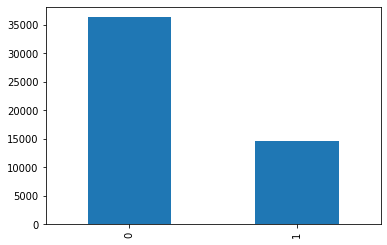

In [54]:
# Distribution of Churn
train.Churn.value_counts()[0:30].plot(kind='bar')
plt.show()

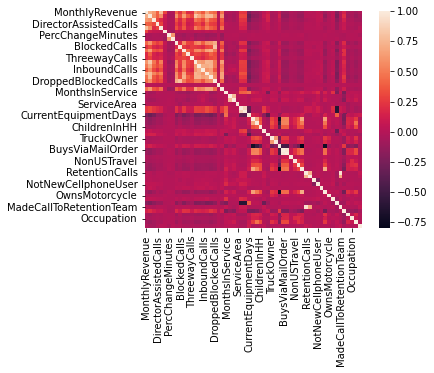

In [55]:
train = train[['MonthlyRevenue','MonthlyMinutes','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes',
         'RoamingCalls','PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls','UnansweredCalls','CustomerCareCalls',
         'ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','DroppedBlockedCalls','CallForwardingCalls'
         ,'CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','ServiceArea','Handsets','HandsetModels',              
'CurrentEquipmentDays','AgeHH1','AgeHH2','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings',          
'NonUSTravel','OwnsComputer','HasCreditCard','RetentionCalls','RetentionOffersAccepted','NewCellphoneUser',          
'NotNewCellphoneUser','ReferralsMadeBySubscriber','IncomeGroup','OwnsMotorcycle','AdjustmentsToCreditRating', 
'HandsetPrice','MadeCallToRetentionTeam','CreditRating','PrizmCode','Occupation','MaritalStatus','Churn']] #Subsetting the data
cor = train.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

-6.17

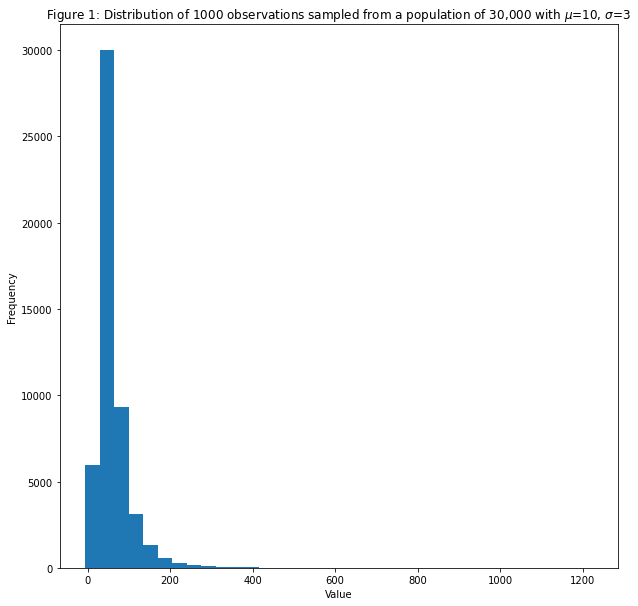

In [56]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(train.MonthlyRevenue,bins=35 ,)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Figure 1: Distribution of 1000 observations sampled from a population of 30,000 with $\mu$=10, $\sigma$=3",)
mu_obs=train.MonthlyRevenue.mean()
mu_obs
train.MonthlyRevenue.min()



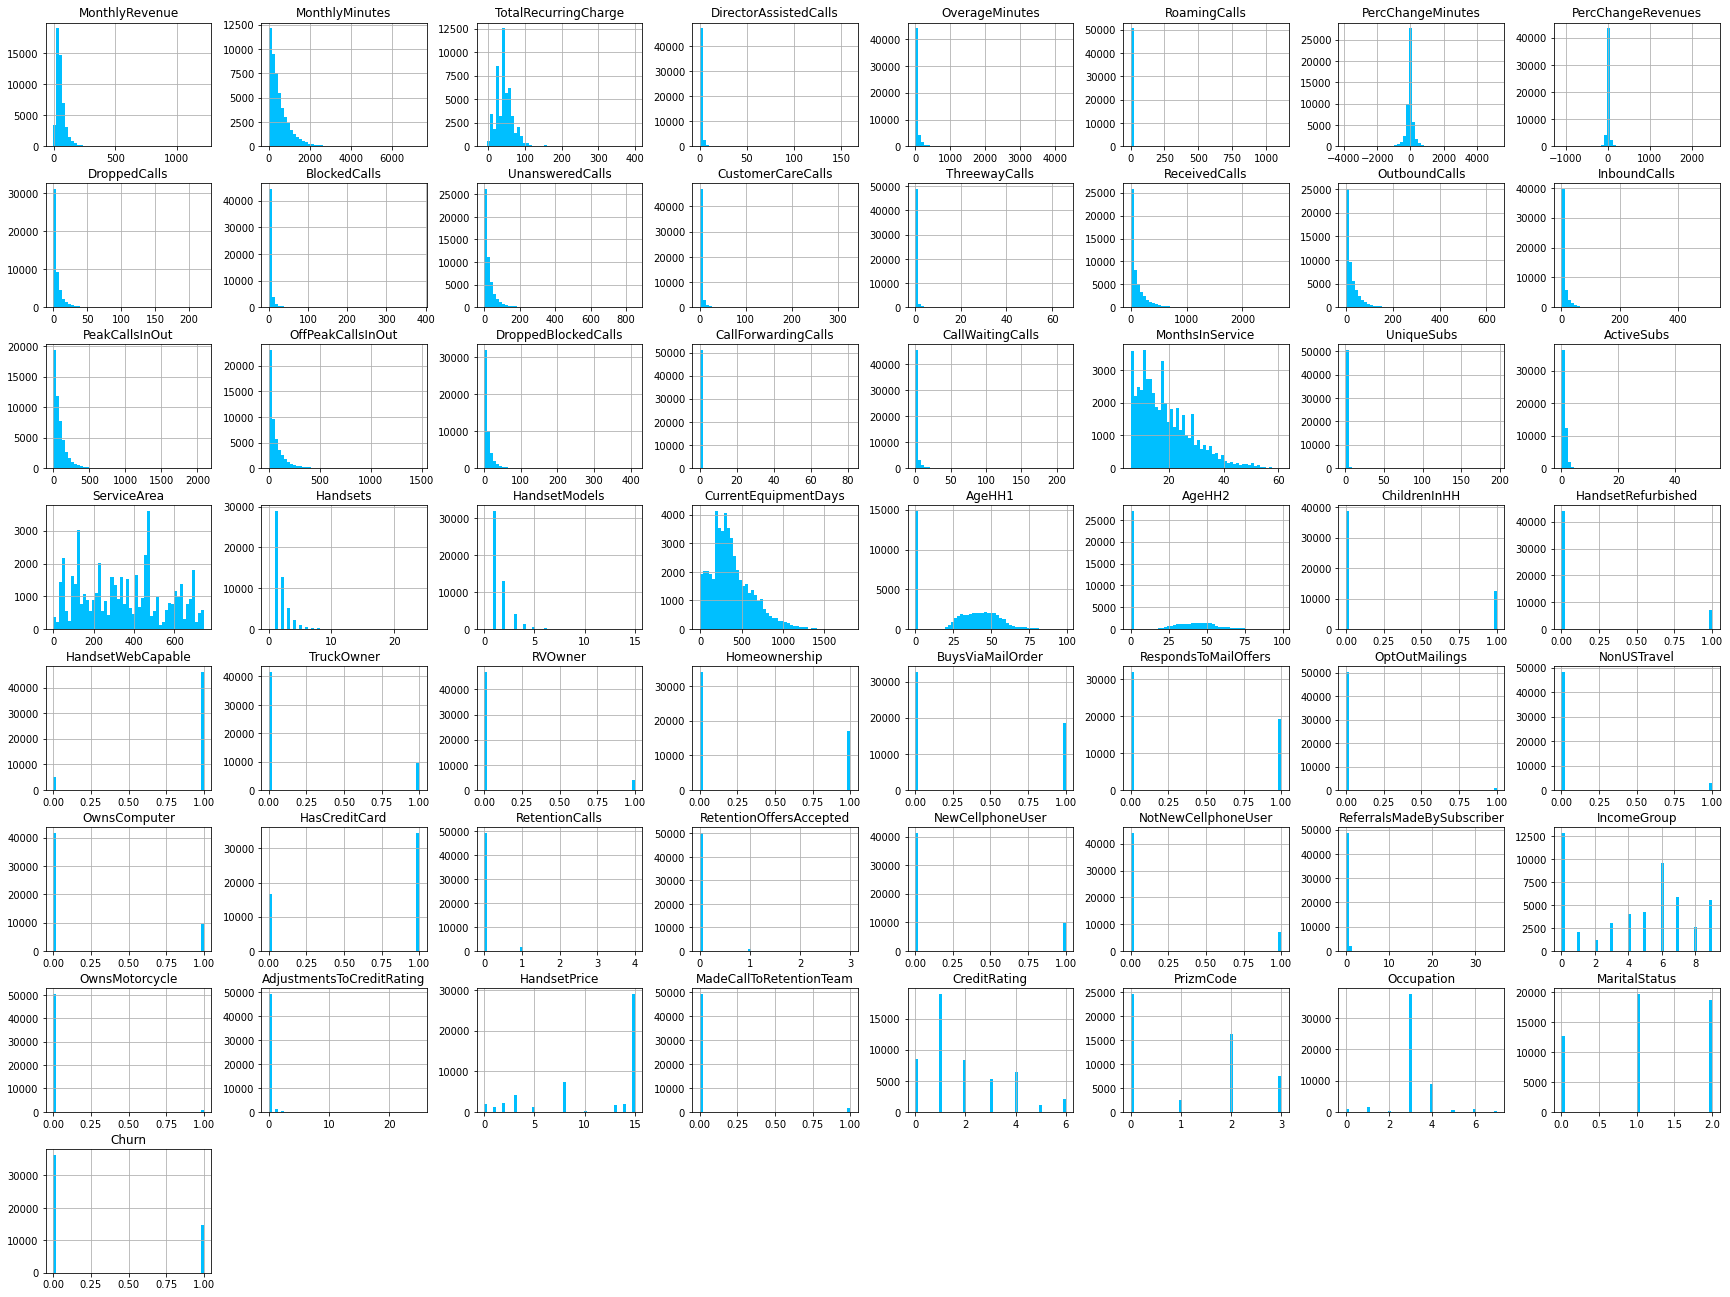

In [57]:
# Graph distribution
train.hist (bins=50, figsize=(30,23), color = 'deepskyblue')

plt.show()

## SPLITING DATA

In [58]:

Y = train['Churn']
X = train.drop(columns=['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=9)

# Train model logistic Reg in imbalanced data

In [ ]:

lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

In [ ]:
# Checking accuracy
accuracy_score(y_test, lr_pred)

0.7123081945804767

In [ ]:
# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0    15315
Name: 0, dtype: int64

In [ ]:
y_test.value_counts()

0    10909
1     4406
Name: Churn, dtype: int64

In [ ]:
#f1_scor is a suitable measure of models tested with imbalance datasets
f1_score(y_test, predictions, average='macro')

0.41599298352654057

In [ ]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, lr_pred))

,0,1
0,10909,0
1,4406,0


as above high biased to the majoriy class

## Deal with imbalanced data by using Resampling Techniques







*   Oversampling Minority Class: Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don't have a ton of data to work with. A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.



In [ ]:
from sklearn.utils import resample

In [ ]:
# separate minority and majority classes
not_Churn = train[train.Churn==0]
Churn = train[train.Churn==1]

# upsample minority
Churn_upsampled = resample(Churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_Churn), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_Churn, Churn_upsampled])

# check new class counts
upsampled.Churn.value_counts()

1    36336
0    36336
Name: Churn, dtype: int64

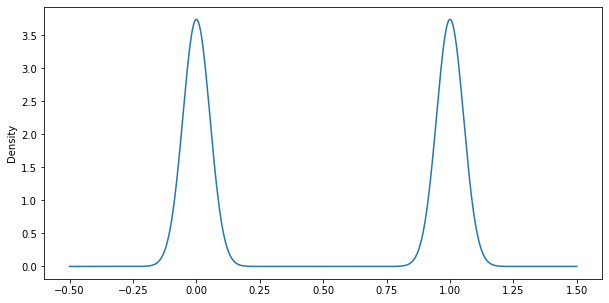

In [ ]:
#plot the distribution after applying upsameling 
upsampled['Churn'].plot(kind="density", figsize=(10,5))

trying logistic regression again with the balanced dataset

Upsampled

In [ ]:

y_train = upsampled.Churn
X_train = upsampled.drop('Churn', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

In [ ]:
# Checking accuracy
accuracy_score(y_test, upsampled_pred)

0.5726412014365002

In [ ]:
# f1 score
f1_score(y_test, upsampled_pred)

0.43891984569224174

In [ ]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, upsampled_pred))

,0,1
0,6210,4699
1,1846,2560


Our accuracy score decreased after upsampling, but the model is now predicting both classes more equally

In [ ]:
recall_score(y_test, upsampled_pred)

0.5810258738084431

Downsample majority

In [ ]:
not_Churn_downsampled = resample(not_Churn,
                                replace = False, # sample without replacement
                                n_samples = len(Churn), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_Churn_downsampled, Churn])

# checking counts
downsampled.Churn.value_counts()

1    14711
0    14711
Name: Churn, dtype: int64

trying logistic regression again with the undersampled dataset

In [ ]:


y_train = downsampled.Churn
X_train = downsampled.drop('Churn', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

In [ ]:
# Checking accuracy
accuracy_score(y_test, undersampled_pred)

0.5719229513548808

In [ ]:
# f1 score
f1_score(y_test, undersampled_pred)

0.4355088686068537

In [ ]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, undersampled_pred))

,0,1
0,6230,4679
1,1877,2529


In [ ]:
recall_score(y_test, undersampled_pred)

0.5739900136177939

Downsampling produced a higher recall score than upsampling! My concern here is the small number of total samples we used to train the model

# XGB - Grid Search CV to find best n_estimators (F1_score)

Finally Apply SMOTE or Synthetic Minority Oversampling Technique is a popular algorithm to creates sythetic observations of the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = train.Churn
X = train.drop('Churn', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)


In [ ]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
accuracy_score(y_test, smote_pred)

0.5877605391004544

In [ ]:
# f1 score
f1_score(y_test, smote_pred)

0.36315216075535645

In [ ]:
recall_score(y_test, smote_pred)

0.40749796251018744

In [ ]:
# confustion matrix
pd.DataFrame(confusion_matrix(y_test, smote_pred))

,0,1
0,6001,3080
1,2181,1500


In [ ]:
import xgboost as xgb

In [ ]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_estimators': [50, 100]}

CV_xgb_cfl = GridSearchCV(estimator = xgb_cfl, param_grid = param_grid, scoring ='f1', verbose = 2)
CV_xgb_cfl.fit(X_train, y_train)

best_parameters = CV_xgb_cfl.best_params_
print("The best parameters for using this model is", best_parameters)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ....................................n_estimators=50; total time=   3.7s
[CV] END ....................................n_estimators=50; total time=   3.5s
[CV] END ....................................n_estimators=50; total time=   3.3s
[CV] END ....................................n_estimators=50; total time=   3.2s
[CV] END ....................................n_estimators=50; total time=   3.2s
[CV] END ...................................n_estimators=100; total time=   6.6s
[CV] END ...................................n_estimators=100; total time=   6.6s
[CV] END ...................................n_estimators=100; total time=   6.3s
[CV] END ...................................n_estimators=100; total time=   6.2s
[CV] END ...................................n_estimators=100; total time=   6.4s
The best parameters for using this model is {'n_estimators': 100}


In [ ]:
CV_xgb_cfl.cv_results_

{'mean_fit_time': array([3.35098586, 6.37960749]),
 'mean_score_time': array([0.03131533, 0.04369512]),
 'mean_test_score': array([0.6100701 , 0.61263418]),
 'param_n_estimators': masked_array(data=[50, 100],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 50}, {'n_estimators': 100}],
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_test_score': array([0.22710294, 0.17477276]),
 'split1_test_score': array([0.21008403, 0.17995588]),
 'split2_test_score': array([0.86605061, 0.89699274]),
 'split3_test_score': array([0.8714067 , 0.90043586]),
 'split4_test_score': array([0.87570621, 0.91101367]),
 'std_fit_time': array([0.16784191, 0.17585592]),
 'std_score_time': array([0.00050127, 0.00156643]),
 'std_test_score': array([0.31969926, 0.35543018])}

## XGB - With best hyperparameters

In [ ]:
# xgb
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,n_estimators = 100)

xgb_cfl.fit(X_train, y_train)

XGBClassifier(n_jobs=-1)

In [ ]:
X_train.shape,X_test.shape

((54510, 57), (12762, 57))

In [ ]:
y_pred = xgb_cfl.predict(X_test)

In [ ]:
y_score = xgb_cfl.predict_proba(X_test)[:,1]

In [ ]:
# f1 score
f1_score(y_test, y_pred)

0.2614184923876718

<Figure size 432x288 with 0 Axes>

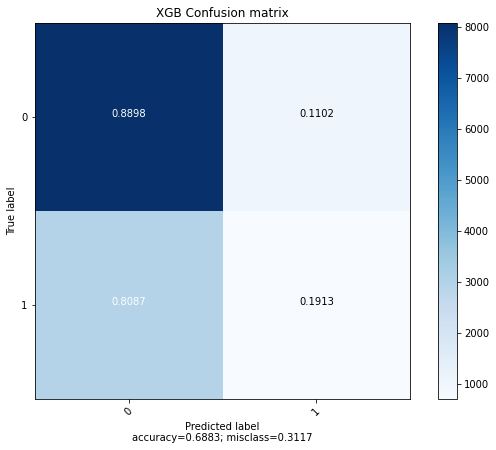

In [ ]:
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      target_names = class_names, 
                      title = 'XGB Confusion matrix')
plt.show()

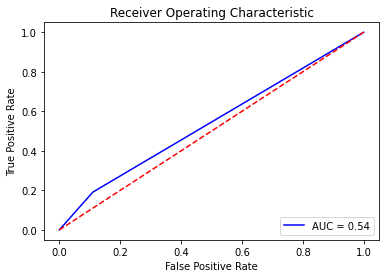

In [ ]:
buildROC(y_test, y_pred)

# PCA

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
PCA_ = PCA(n_components=15, svd_solver='full')
X_train = PCA_.fit_transform(X_train,y_train)
X_test = PCA_.transform(X_test)

# SVM Classification : linear

In [29]:
from sklearn import svm
classifier = svm.SVC(kernel='linear') # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)

In [30]:
classifier.fit(X_train, y_train) # Then we train our model, with our balanced data train.

SVC(kernel='linear')

In [31]:
prediction_SVM_all = classifier.predict(X_test) #And finally, we predict our data test.

In [32]:
accuracy_score(y_test,prediction_SVM_all)

0.7123081945804767

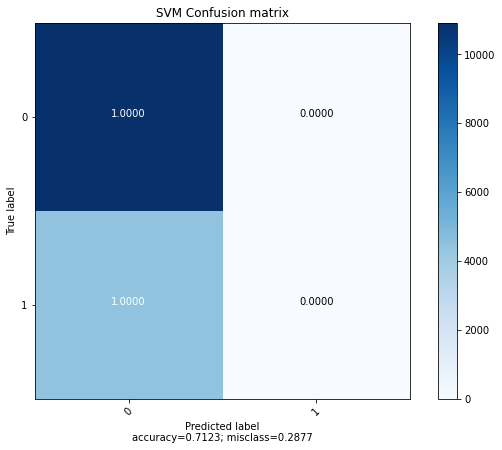

In [33]:
cm = confusion_matrix(y_test, prediction_SVM_all)
class_names = [0,1]
plot_confusion_matrix(cm, 
                      target_names = class_names, 
                      title = 'SVM Confusion matrix')

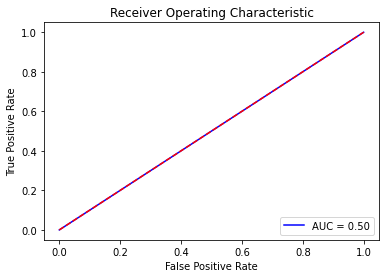

In [34]:
buildROC(y_test, prediction_SVM_all)

# RandomForestClassifier

In [52]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred)

0.7123081945804767

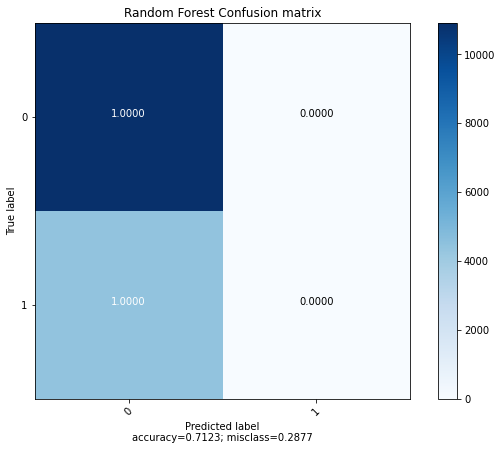

In [54]:
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plot_confusion_matrix(cm, 
                      target_names = class_names, 
                      title = 'Random Forest Confusion matrix')

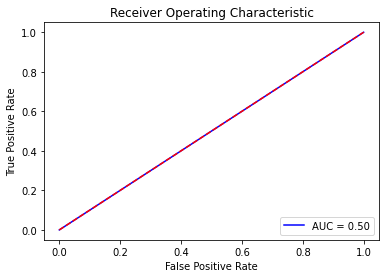

In [55]:
buildROC(y_test, y_pred)

# Working with Restricted Boltzmann Machines (Gibbs' sampling)

In [35]:
pip install learnergy

     |████████████████████████████████| 60 kB 3.3 MB/s 
     |████████████████████████████████| 213 kB 10.7 MB/s 
     |████████████████████████████████| 11.2 MB 40.0 MB/s 
     |████████████████████████████████| 414 kB 44.1 MB/s 
     |████████████████████████████████| 4.3 MB 42.2 MB/s 
     |████████████████████████████████| 280 kB 47.4 MB/s 
     |████████████████████████████████| 890 kB 43.7 MB/s 
     |████████████████████████████████| 103 kB 49.5 MB/s 
     |████████████████████████████████| 254 kB 43.3 MB/s 
     |████████████████████████████████| 843 kB 47.5 MB/s 
     |████████████████████████████████| 57 kB 5.1 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: pluggy
    Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1
  Attempting uninstall: matplotlib
    Found existing install

In [36]:
from sklearn.feature_selection import SelectFromModel
from torch.utils.data import DataLoader, TensorDataset
import torch
from torch import nn, optim
from tqdm import tqdm
from learnergy.models.bernoulli import RBM

In [59]:
# Normalizes both training and testing data
X_train = X_train / 255
X_test = X_test / 255


In [60]:
# Creates a TensorDataset from training samples and labels
train_set = TensorDataset(torch.Tensor(X_train.values), torch.Tensor(y_train.values).long())

# Creates a simple tensor from testing samples
# Note that we can directly iterate through tensors as they implement __getitem__ and __len__
test_set = torch.Tensor(X_train.values)

In [ ]:
X_train.shape 

In [61]:
# Creates an RBM
model = RBM(n_visible=56, n_hidden=384, steps=1, learning_rate=0.1,
            momentum=0, decay=0, temperature=1, use_gpu=True)

# Trains an RBM
mse, pl = model.fit(train_set, batch_size=35732, epochs=50)

2022-01-04 16:28:19,994 - learnergy.models.bernoulli.rbm — INFO — Overriding class: Model -> RBM.
2022-01-04 16:28:20,062 - learnergy.core.model — DEBUG — Device: cuda.
2022-01-04 16:28:28,736 - learnergy.models.bernoulli.rbm — INFO — Class overrided.
2022-01-04 16:28:28,741 - learnergy.models.bernoulli.rbm — DEBUG — Size: (56, 384) | Learning: CD-1 | Hyperparameters: lr = 0.1, momentum = 0, decay = 0, T = 1.
2022-01-04 16:28:28,745 - learnergy.models.bernoulli.rbm — INFO — Epoch 1/50


100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

2022-01-04 16:28:29,995 - learnergy.models.bernoulli.rbm — INFO — MSE: 37.421135 | log-PL: -11.944257
2022-01-04 16:28:30,001 - learnergy.models.bernoulli.rbm — INFO — Epoch 2/50



100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

2022-01-04 16:28:30,542 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.416911 | log-PL: -16.671337
2022-01-04 16:28:30,544 - learnergy.models.bernoulli.rbm — INFO — Epoch 3/50



100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

2022-01-04 16:28:31,062 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.016283 | log-PL: -19.278347
2022-01-04 16:28:31,064 - learnergy.models.bernoulli.rbm — INFO — Epoch 4/50



100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

2022-01-04 16:28:31,587 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.871350 | log-PL: -23.098534
2022-01-04 16:28:31,589 - learnergy.models.bernoulli.rbm — INFO — Epoch 5/50



100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

2022-01-04 16:28:32,102 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.574233 | log-PL: -22.744823
2022-01-04 16:28:32,103 - learnergy.models.bernoulli.rbm — INFO — Epoch 6/50



100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

2022-01-04 16:28:32,625 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.999808 | log-PL: -24.186985
2022-01-04 16:28:32,627 - learnergy.models.bernoulli.rbm — INFO — Epoch 7/50



100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

2022-01-04 16:28:33,147 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.439735 | log-PL: -24.430111
2022-01-04 16:28:33,153 - learnergy.models.bernoulli.rbm — INFO — Epoch 8/50



100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

2022-01-04 16:28:33,701 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.467570 | log-PL: -28.572180
2022-01-04 16:28:33,704 - learnergy.models.bernoulli.rbm — INFO — Epoch 9/50



100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

2022-01-04 16:28:34,238 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.932385 | log-PL: -24.144186
2022-01-04 16:28:34,239 - learnergy.models.bernoulli.rbm — INFO — Epoch 10/50



100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

2022-01-04 16:28:34,793 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.120990 | log-PL: -29.115948
2022-01-04 16:28:34,799 - learnergy.models.bernoulli.rbm — INFO — Epoch 11/50



100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

2022-01-04 16:28:35,337 - learnergy.models.bernoulli.rbm — INFO — MSE: 12.235535 | log-PL: -24.478506
2022-01-04 16:28:35,344 - learnergy.models.bernoulli.rbm — INFO — Epoch 12/50



100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

2022-01-04 16:28:35,873 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.294248 | log-PL: -27.587408
2022-01-04 16:28:35,875 - learnergy.models.bernoulli.rbm — INFO — Epoch 13/50



100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

2022-01-04 16:28:36,398 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.348676 | log-PL: -26.808355
2022-01-04 16:28:36,402 - learnergy.models.bernoulli.rbm — INFO — Epoch 14/50



100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

2022-01-04 16:28:36,921 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.255461 | log-PL: -30.000422
2022-01-04 16:28:36,923 - learnergy.models.bernoulli.rbm — INFO — Epoch 15/50



100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

2022-01-04 16:28:37,445 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.912537 | log-PL: -29.914461
2022-01-04 16:28:37,450 - learnergy.models.bernoulli.rbm — INFO — Epoch 16/50



100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

2022-01-04 16:28:37,966 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.579000 | log-PL: -26.600183
2022-01-04 16:28:37,969 - learnergy.models.bernoulli.rbm — INFO — Epoch 17/50



100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

2022-01-04 16:28:38,694 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.110508 | log-PL: -25.641726
2022-01-04 16:28:38,700 - learnergy.models.bernoulli.rbm — INFO — Epoch 18/50



100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

2022-01-04 16:28:39,228 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.349873 | log-PL: -27.772219
2022-01-04 16:28:39,230 - learnergy.models.bernoulli.rbm — INFO — Epoch 19/50



100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

2022-01-04 16:28:39,763 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.583011 | log-PL: -33.439640
2022-01-04 16:28:39,767 - learnergy.models.bernoulli.rbm — INFO — Epoch 20/50



100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

2022-01-04 16:28:40,294 - learnergy.models.bernoulli.rbm — INFO — MSE: 12.253576 | log-PL: -32.387749
2022-01-04 16:28:40,296 - learnergy.models.bernoulli.rbm — INFO — Epoch 21/50



100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

2022-01-04 16:28:40,830 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.137538 | log-PL: -30.901245
2022-01-04 16:28:40,836 - learnergy.models.bernoulli.rbm — INFO — Epoch 22/50



100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

2022-01-04 16:28:41,356 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.795008 | log-PL: -21.439371
2022-01-04 16:28:41,360 - learnergy.models.bernoulli.rbm — INFO — Epoch 23/50



100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

2022-01-04 16:28:41,879 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.722243 | log-PL: -32.124096
2022-01-04 16:28:41,880 - learnergy.models.bernoulli.rbm — INFO — Epoch 24/50



100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

2022-01-04 16:28:42,597 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.583577 | log-PL: -31.820107
2022-01-04 16:28:42,602 - learnergy.models.bernoulli.rbm — INFO — Epoch 25/50



100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

2022-01-04 16:28:43,140 - learnergy.models.bernoulli.rbm — INFO — MSE: 12.063640 | log-PL: -27.360661
2022-01-04 16:28:43,145 - learnergy.models.bernoulli.rbm — INFO — Epoch 26/50



100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

2022-01-04 16:28:43,689 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.548686 | log-PL: -26.533190
2022-01-04 16:28:43,691 - learnergy.models.bernoulli.rbm — INFO — Epoch 27/50



100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

2022-01-04 16:28:44,222 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.756493 | log-PL: -33.115749
2022-01-04 16:28:44,225 - learnergy.models.bernoulli.rbm — INFO — Epoch 28/50



100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

2022-01-04 16:28:44,761 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.575993 | log-PL: -26.554304
2022-01-04 16:28:44,763 - learnergy.models.bernoulli.rbm — INFO — Epoch 29/50



100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

2022-01-04 16:28:45,300 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.976375 | log-PL: -34.656334
2022-01-04 16:28:45,307 - learnergy.models.bernoulli.rbm — INFO — Epoch 30/50



100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

2022-01-04 16:28:45,842 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.622396 | log-PL: -23.706364
2022-01-04 16:28:45,844 - learnergy.models.bernoulli.rbm — INFO — Epoch 31/50



100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

2022-01-04 16:28:46,568 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.537039 | log-PL: -28.896320
2022-01-04 16:28:46,573 - learnergy.models.bernoulli.rbm — INFO — Epoch 32/50



100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

2022-01-04 16:28:47,122 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.685833 | log-PL: -34.003597
2022-01-04 16:28:47,125 - learnergy.models.bernoulli.rbm — INFO — Epoch 33/50



100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

2022-01-04 16:28:47,670 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.030827 | log-PL: -28.968468
2022-01-04 16:28:47,673 - learnergy.models.bernoulli.rbm — INFO — Epoch 34/50



100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

2022-01-04 16:28:48,191 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.520681 | log-PL: -24.416586
2022-01-04 16:28:48,193 - learnergy.models.bernoulli.rbm — INFO — Epoch 35/50



100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

2022-01-04 16:28:48,924 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.554811 | log-PL: -36.660576
2022-01-04 16:28:48,930 - learnergy.models.bernoulli.rbm — INFO — Epoch 36/50



100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

2022-01-04 16:28:49,492 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.966978 | log-PL: -26.796947
2022-01-04 16:28:49,498 - learnergy.models.bernoulli.rbm — INFO — Epoch 37/50



100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

2022-01-04 16:28:50,050 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.548645 | log-PL: -25.253586
2022-01-04 16:28:50,053 - learnergy.models.bernoulli.rbm — INFO — Epoch 38/50



100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

2022-01-04 16:28:50,586 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.870451 | log-PL: -31.227539
2022-01-04 16:28:50,588 - learnergy.models.bernoulli.rbm — INFO — Epoch 39/50



100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

2022-01-04 16:28:51,128 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.500042 | log-PL: -33.882690
2022-01-04 16:28:51,132 - learnergy.models.bernoulli.rbm — INFO — Epoch 40/50



100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

2022-01-04 16:28:51,656 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.863149 | log-PL: -27.646484
2022-01-04 16:28:51,658 - learnergy.models.bernoulli.rbm — INFO — Epoch 41/50



100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

2022-01-04 16:28:52,183 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.734891 | log-PL: -32.534531
2022-01-04 16:28:52,187 - learnergy.models.bernoulli.rbm — INFO — Epoch 42/50



100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

2022-01-04 16:28:52,897 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.932428 | log-PL: -23.989540
2022-01-04 16:28:52,900 - learnergy.models.bernoulli.rbm — INFO — Epoch 43/50



100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

2022-01-04 16:28:53,437 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.891954 | log-PL: -30.786222
2022-01-04 16:28:53,442 - learnergy.models.bernoulli.rbm — INFO — Epoch 44/50



100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

2022-01-04 16:28:54,745 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.837640 | log-PL: -38.830734
2022-01-04 16:28:54,752 - learnergy.models.bernoulli.rbm — INFO — Epoch 45/50



100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

2022-01-04 16:28:55,349 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.536156 | log-PL: -28.469303
2022-01-04 16:28:55,355 - learnergy.models.bernoulli.rbm — INFO — Epoch 46/50



100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

2022-01-04 16:28:56,059 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.576266 | log-PL: -22.592705
2022-01-04 16:28:56,060 - learnergy.models.bernoulli.rbm — INFO — Epoch 47/50



100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

2022-01-04 16:28:56,605 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.069668 | log-PL: -36.771362
2022-01-04 16:28:56,610 - learnergy.models.bernoulli.rbm — INFO — Epoch 48/50



100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

2022-01-04 16:28:57,168 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.897877 | log-PL: -29.040001
2022-01-04 16:28:57,174 - learnergy.models.bernoulli.rbm — INFO — Epoch 49/50



100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

2022-01-04 16:28:57,709 - learnergy.models.bernoulli.rbm — INFO — MSE: 10.779914 | log-PL: -28.591803
2022-01-04 16:28:57,716 - learnergy.models.bernoulli.rbm — INFO — Epoch 50/50



100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

2022-01-04 16:28:58,259 - learnergy.models.bernoulli.rbm — INFO — MSE: 11.297470 | log-PL: -28.235941


## Fine-Tuning to Downstream Classification Task

In [62]:
# Defines some input variables
batch_size = 35732
n_classes = 56
fine_tune_epochs = 100

# Creates the fully-connected layer to append on top of RBM
fc = nn.Linear(model.n_hidden, n_classes)

# Checks if model uses GPU
if model.device == 'cuda':
    # If yes, put fully-connected on GPU
    fc = fc.cuda()

# Cross-Entropy loss is used for the discriminative fine-tuning
criterion = torch.nn.CrossEntropyLoss()

# Creates the optimzers
optimizer = [optim.Adam(model.parameters(), lr=0.001),
             optim.Adam(fc.parameters(), lr=0.001)]

# Creates the training batches
train_batch = DataLoader(train_set, batch_size=batch_size, shuffle=False, num_workers=1)

# For amount of fine-tuning epochs
for e in range(fine_tune_epochs):
    print(f'Epoch {e+1}/{fine_tune_epochs}')

    # Resetting metrics
    train_loss, val_acc = 0, 0
    
    # For every possible batch
    for x_batch, y_batch in tqdm(train_batch):
        # For every possible optimizer
        for opt in optimizer:
            # Resets the optimizer
            opt.zero_grad()
        
        # Flatenning the samples batch
        x_batch = x_batch.reshape(x_batch.size(0), model.n_visible)

        # Checking whether GPU is avaliable and if it should be used
        if model.device == 'cuda':
            # Applies the GPU usage to the data and labels
            x_batch = x_batch.cuda()
            y_batch = y_batch.cuda()

        # Passing the batch down the model
        y = model(x_batch)

        # Calculating the fully-connected outputs
        y = fc(y)
        
        # Calculating loss
        loss = criterion(y, y_batch)
        
        # Propagating the loss to calculate the gradients
        loss.backward()
        
        # For every possible optimizer
        for opt in optimizer:
            # Performs the gradient update
            opt.step()

        # Adding current batch loss
        train_loss += loss.item()

    print(f'Loss: {train_loss / len(train_batch)}')

Epoch 1/100


100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Loss: 4.144382953643799
Epoch 2/100


100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Loss: 3.411018133163452
Epoch 3/100


100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Loss: 2.715909957885742
Epoch 4/100


100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Loss: 2.0914368629455566
Epoch 5/100


100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Loss: 1.579093098640442
Epoch 6/100


100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Loss: 1.2073752880096436
Epoch 7/100


100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Loss: 0.9665274024009705
Epoch 8/100


100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Loss: 0.817767858505249
Epoch 9/100


100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Loss: 0.7254224419593811
Epoch 10/100


100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Loss: 0.6691972017288208
Epoch 11/100


100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Loss: 0.6384069919586182
Epoch 12/100


100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


Loss: 0.6253957152366638
Epoch 13/100


100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Loss: 0.6231710910797119
Epoch 14/100


100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Loss: 0.6256269812583923
Epoch 15/100


100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Loss: 0.6282723546028137
Epoch 16/100


100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Loss: 0.6285751461982727
Epoch 17/100


100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Loss: 0.625716507434845
Epoch 18/100


100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Loss: 0.6202554106712341
Epoch 19/100


100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Loss: 0.6136077046394348
Epoch 20/100


100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Loss: 0.6074853539466858
Epoch 21/100


100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Loss: 0.6034260988235474
Epoch 22/100


100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


Loss: 0.602206289768219
Epoch 23/100


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


Loss: 0.6035565137863159
Epoch 24/100


100%|██████████| 1/1 [00:01<00:00,  1.61s/it]


Loss: 0.6062653660774231
Epoch 25/100


100%|██████████| 1/1 [00:01<00:00,  1.45s/it]


Loss: 0.6087017059326172
Epoch 26/100


100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


Loss: 0.6096169352531433
Epoch 27/100


100%|██████████| 1/1 [00:01<00:00,  1.49s/it]


Loss: 0.6086301803588867
Epoch 28/100


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


Loss: 0.6063092350959778
Epoch 29/100


100%|██████████| 1/1 [00:01<00:00,  1.61s/it]


Loss: 0.6037139892578125
Epoch 30/100


100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


Loss: 0.6018487215042114
Epoch 31/100


100%|██████████| 1/1 [00:01<00:00,  1.45s/it]


Loss: 0.6012256741523743
Epoch 32/100


100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


Loss: 0.6017394661903381
Epoch 33/100


100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


Loss: 0.6028550267219543
Epoch 34/100


100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


Loss: 0.603904128074646
Epoch 35/100


100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


Loss: 0.604370653629303
Epoch 36/100


100%|██████████| 1/1 [00:01<00:00,  1.36s/it]


Loss: 0.604096531867981
Epoch 37/100


100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Loss: 0.6032362580299377
Epoch 38/100


100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Loss: 0.6021765470504761
Epoch 39/100


100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Loss: 0.6013498306274414
Epoch 40/100


100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Loss: 0.6010383367538452
Epoch 41/100


100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Loss: 0.6012325286865234
Epoch 42/100


100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Loss: 0.6017354726791382
Epoch 43/100


100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Loss: 0.6021950244903564
Epoch 44/100


100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Loss: 0.6023643612861633
Epoch 45/100


100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Loss: 0.6021573543548584
Epoch 46/100


100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Loss: 0.6017075181007385
Epoch 47/100


100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Loss: 0.6012640595436096
Epoch 48/100


100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Loss: 0.6010078191757202
Epoch 49/100


100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Loss: 0.601004421710968
Epoch 50/100


100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Loss: 0.6011943221092224
Epoch 51/100


100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Loss: 0.6014227867126465
Epoch 52/100


100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Loss: 0.6015427112579346
Epoch 53/100


100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Loss: 0.6015017032623291
Epoch 54/100


100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Loss: 0.6013332605361938
Epoch 55/100


100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Loss: 0.6011214852333069
Epoch 56/100


100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Loss: 0.6009766459465027
Epoch 57/100


100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Loss: 0.6009461283683777
Epoch 58/100


100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Loss: 0.6010259389877319
Epoch 59/100


100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Loss: 0.6011339426040649
Epoch 60/100


100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Loss: 0.6011971831321716
Epoch 61/100


100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Loss: 0.6011825799942017
Epoch 62/100


100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Loss: 0.6010982990264893
Epoch 63/100


100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Loss: 0.6010011434555054
Epoch 64/100


100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Loss: 0.600936770439148
Epoch 65/100


100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Loss: 0.6009364128112793
Epoch 66/100


100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Loss: 0.6009743809700012
Epoch 67/100


100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Loss: 0.601024866104126
Epoch 68/100


100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Loss: 0.6010462641716003
Epoch 69/100


100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Loss: 0.6010244488716125
Epoch 70/100


100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Loss: 0.6009828448295593
Epoch 71/100


100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Loss: 0.6009425520896912
Epoch 72/100


100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Loss: 0.6009226441383362
Epoch 73/100


100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Loss: 0.6009287238121033
Epoch 74/100


100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Loss: 0.6009512543678284
Epoch 75/100


100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Loss: 0.6009724140167236
Epoch 76/100


100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Loss: 0.6009692549705505
Epoch 77/100


100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Loss: 0.6009566187858582
Epoch 78/100


100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Loss: 0.6009328961372375
Epoch 79/100


100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Loss: 0.6009135246276855
Epoch 80/100


100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


Loss: 0.6009096503257751
Epoch 81/100


100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Loss: 0.6009223461151123
Epoch 82/100


100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Loss: 0.600933313369751
Epoch 83/100


100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Loss: 0.600929856300354
Epoch 84/100


100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Loss: 0.6009328365325928
Epoch 85/100


100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Loss: 0.6009185910224915
Epoch 86/100


100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Loss: 0.6009060144424438
Epoch 87/100


100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


Loss: 0.6009048223495483
Epoch 88/100


100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Loss: 0.6009111404418945
Epoch 89/100


100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Loss: 0.6009156107902527
Epoch 90/100


100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Loss: 0.6009177565574646
Epoch 91/100


100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Loss: 0.6009151935577393
Epoch 92/100


100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Loss: 0.6009061336517334
Epoch 93/100


100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Loss: 0.6008992791175842
Epoch 94/100


100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Loss: 0.6008948087692261
Epoch 95/100


100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Loss: 0.6008983254432678
Epoch 96/100


100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Loss: 0.6009011268615723
Epoch 97/100


100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Loss: 0.6009011268615723
Epoch 98/100


100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Loss: 0.6009024977684021
Epoch 99/100


100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Loss: 0.6009021401405334
Epoch 100/100


100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

Loss: 0.6008981466293335


In [63]:
# Creates the testing batches
test_batch = DataLoader(test_set, batch_size=len(test_set), shuffle=False, num_workers=1)

# Calculates the test predictions for the model
for x_batch in test_batch:
    # Flatenning the testing samples batch
    x_batch = x_batch.reshape(x_batch.size(0), model.n_visible)

    # Checking whether GPU is avaliable and if it should be used
    if model.device == 'cuda':
        # Applies the GPU usage to the data and labels
        x_batch = x_batch.cuda()
        y_batch = y_batch.cuda()

    # Passing the batch down the model
    y = model(x_batch)

    # Calculating the fully-connected outputs
    y = fc(y)

    # Calculating predictions
    _, preds = torch.max(y, 1)

In [65]:
# Creates the submission data and outputs to a .csv file
output = pd.DataFrame({'ImageId': np.arange(1, len(test_set)+1), 'Label': preds.cpu().data.numpy().argmax()})

output

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
35727,35728,0
35728,35729,0
35729,35730,0
35730,35731,0


# Sales Forecasting 

In [138]:
!kaggle datasets download -d aungpyaeap/supermarket-sales

supermarket-sales.zip: Skipping, found more recently modified local copy (use --force to force download)


In [139]:
with ZipFile('supermarket-sales.zip', 'r') as upermarket_sales:
  upermarket_sales.extractall()

In [140]:
data = pd.read_csv("/content/supermarket_sales - Sheet1.csv")

In [141]:
data 

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [142]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [143]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [144]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [145]:
data.value_counts()

Invoice ID   Branch  City       Customer type  Gender  Product line            Unit price  Quantity  Tax 5%   Total     Date       Time   Payment      cogs    gross margin percentage  gross income  Rating
898-04-2717  A       Yangon     Normal         Male    Fashion accessories     76.40       9         34.3800  721.9800  3/19/2019  15:49  Ewallet      687.60  4.761905                 34.3800       7.5       1
366-43-6862  B       Mandalay   Normal         Male    Electronic accessories  52.89       4         10.5780  222.1380  3/25/2019  16:32  Ewallet      211.56  4.761905                 10.5780       6.7       1
374-17-3652  B       Mandalay   Member         Female  Food and beverages      42.82       9         19.2690  404.6490  2/5/2019   15:26  Credit card  385.38  4.761905                 19.2690       8.9       1
373-88-1424  C       Naypyitaw  Member         Male    Home and lifestyle      35.81       5         8.9525   188.0025  2/6/2019   18:44  Ewallet      179.05  4.7619

In [146]:
data.shape

(1000, 17)

In [147]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [148]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

Checking Null Value

In [149]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [150]:
data.isnull().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

## Exploratory Data Analysis

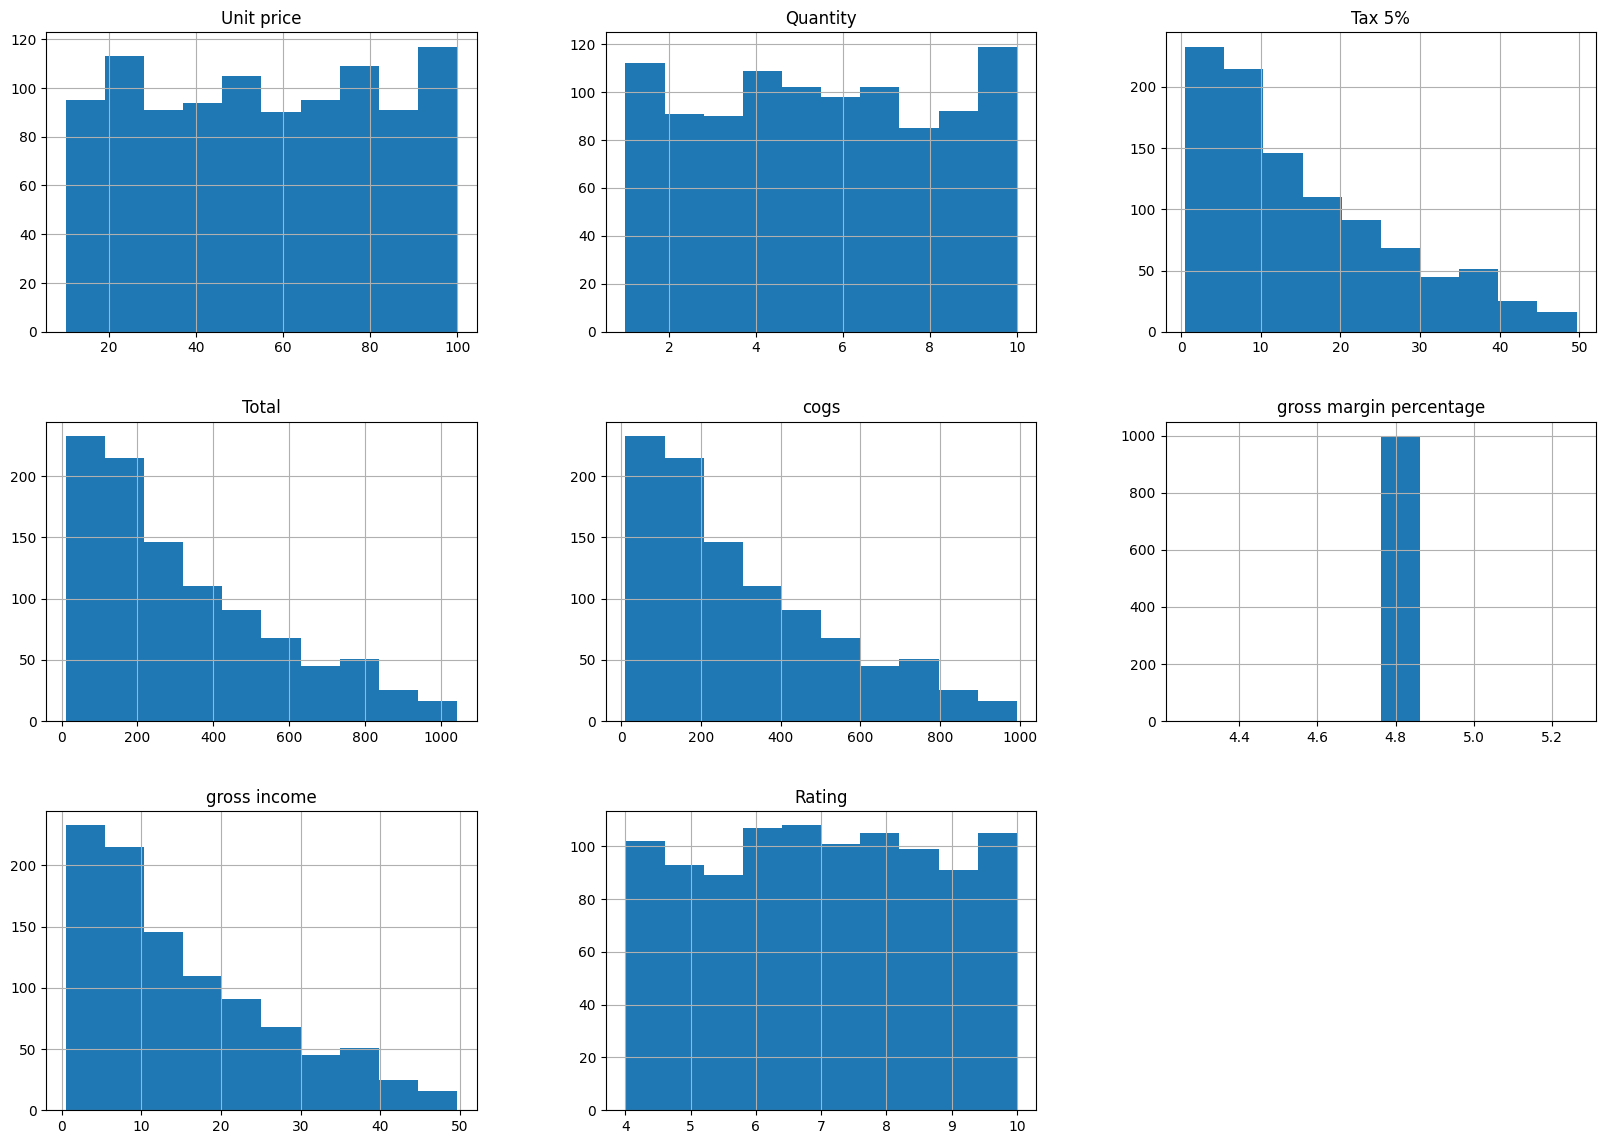

In [151]:
data.hist(figsize=(20,14))
plt.show()

In [152]:
data.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000e+00,1.077756e-02,6.339621e-01,6.339621e-01,6.339621e-01,-6.998957e-16,6.339621e-01,-8.777507e-03
Quantity,1.077756e-02,1.000000e+00,7.055102e-01,7.055102e-01,7.055102e-01,-3.849075e-16,7.055102e-01,-1.581490e-02
Tax 5%,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Total,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.408632e-16,1.000000e+00,-3.644170e-02
cogs,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.439279e-15,1.000000e+00,-3.644170e-02
gross margin percentage,-6.998957e-16,-3.849075e-16,2.461896e-16,2.408632e-16,1.439279e-15,1.000000e+00,2.461896e-16,2.042714e-15
gross income,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Rating,-8.777507e-03,-1.581490e-02,-3.644170e-02,-3.644170e-02,-3.644170e-02,2.042714e-15,-3.644170e-02,1.000000e+00


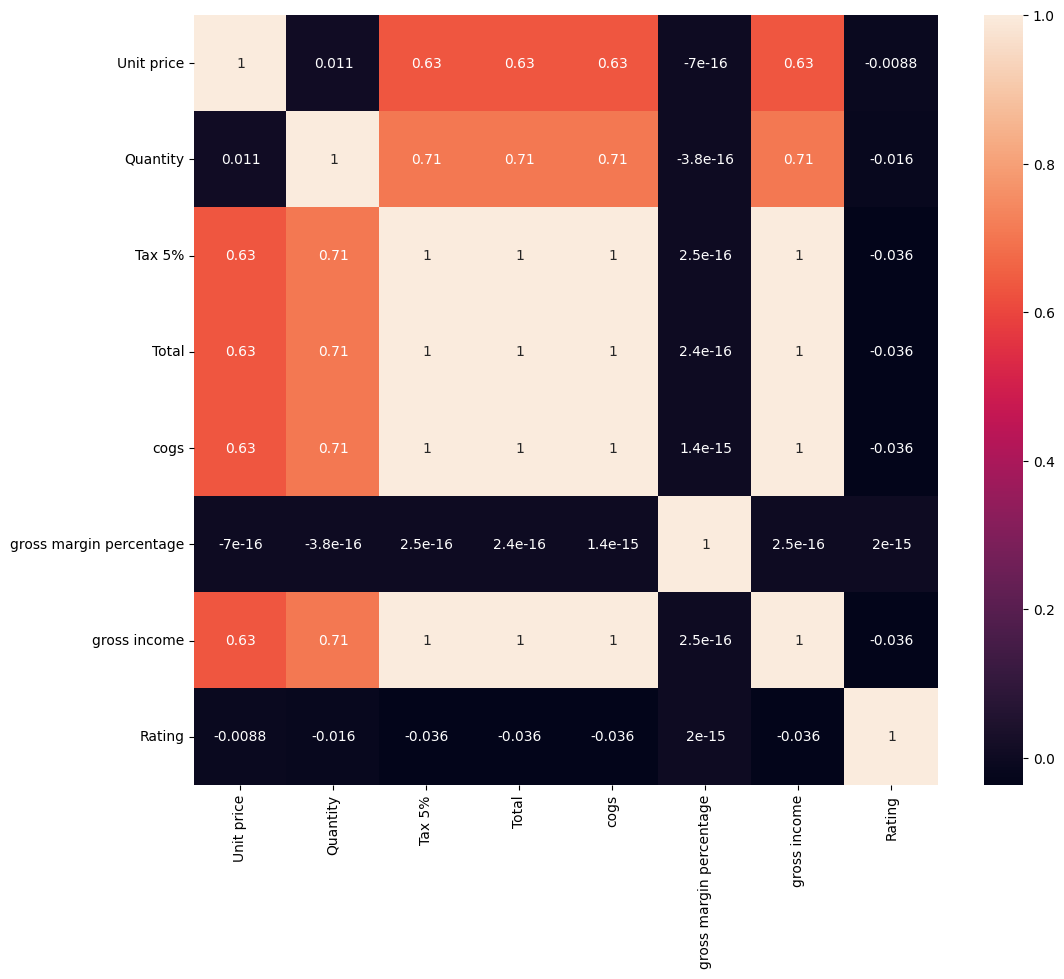

In [153]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)

In [154]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

BOXPLOT

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

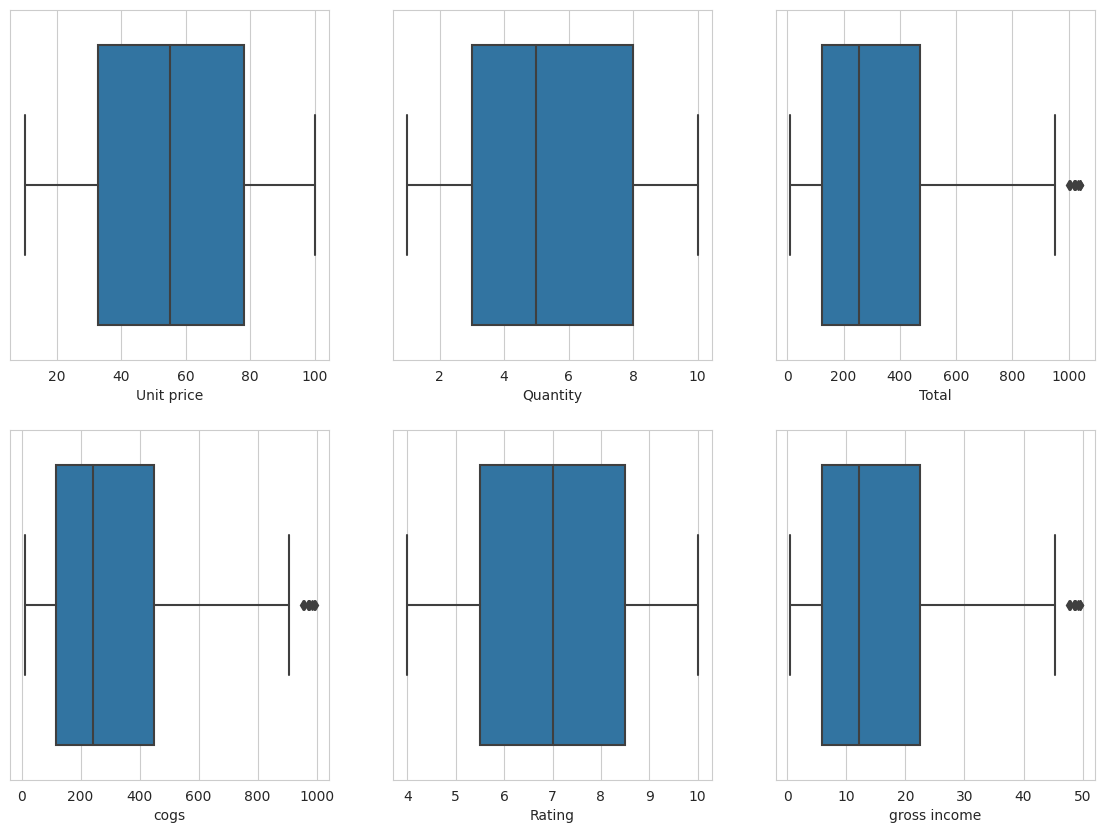

In [155]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Total',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=data)

JOINTPLOT

Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGri

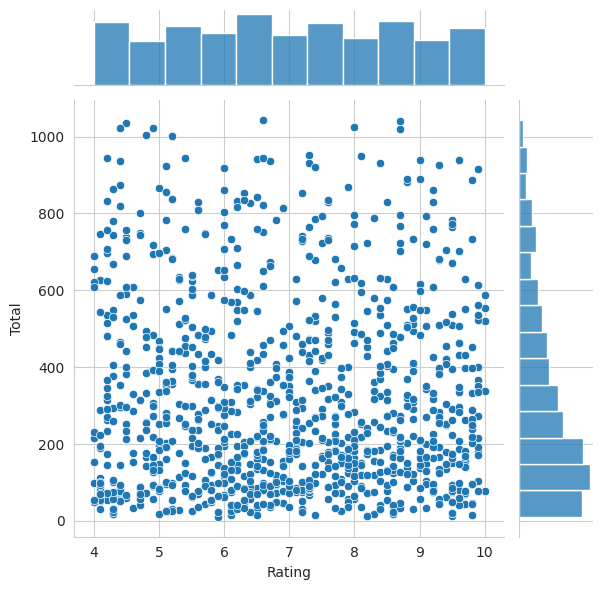

In [156]:
sns.jointplot(x='Rating', y= 'Total', data=data)

CATPLOT

Catplot is a relatively new addition to Seaborn that simplifies plotting that involves categorical variables. In Seaborn version v0. 9.0 that came out in July 2018, changed the older factor plot to catplot to make it more consistent with terminology in pandas and in seaborn.

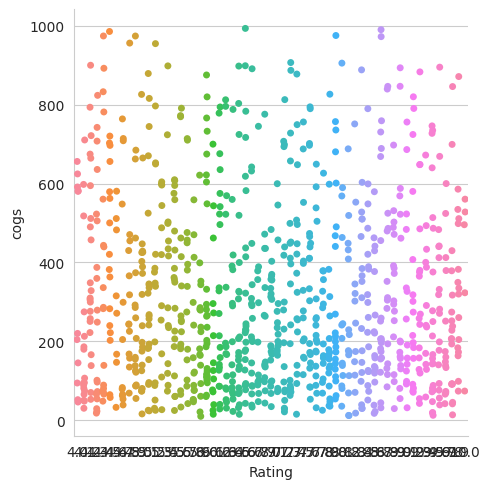

In [157]:
sns.catplot(x='Rating', y= 'cogs', data=data)

KDE PLOT (DENSITY PLOT)

KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. We can also plot a single graph for multiple samples which helps in more efficient data visualization.

LINEPLOT

A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.

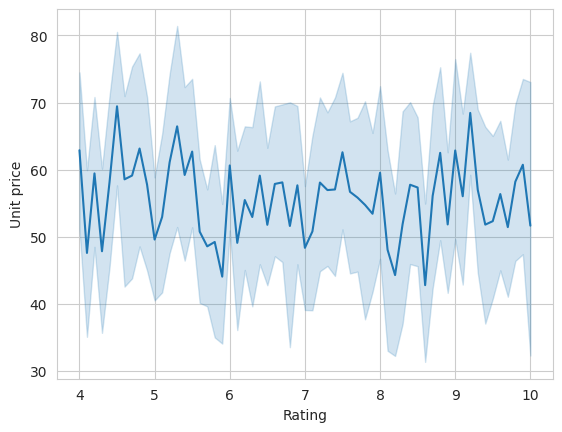

In [158]:
sns.lineplot(x='Rating', y= 'Unit price', data=data)

BARPLOT

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

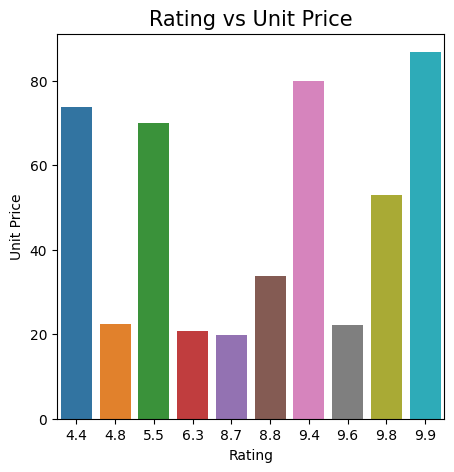

In [159]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Unit price", data=data[170:180])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

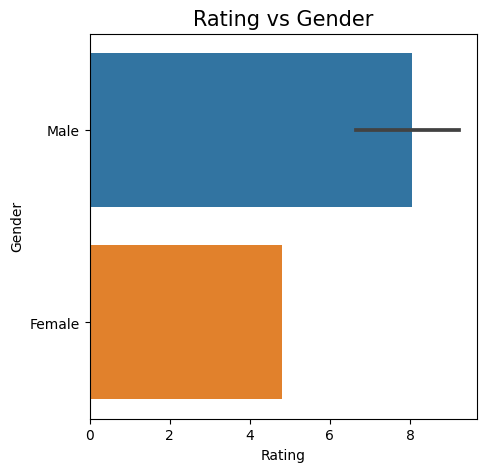

In [160]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Gender", data=data[170:180])
plt.title("Rating vs Gender",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Gender")
plt.show()

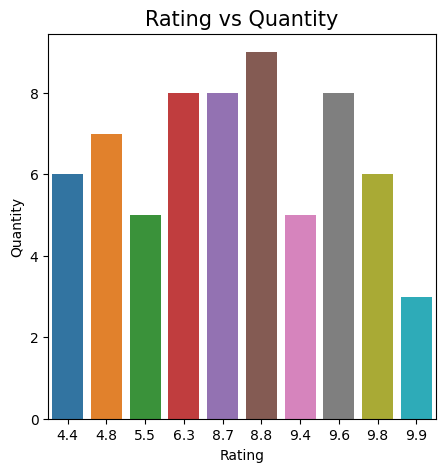

In [161]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Quantity", data=data[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

## find the categorialfeatures

In [162]:
#lets find the categorialfeatures
list_1=list(data.columns)

In [163]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [164]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [165]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [166]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,21,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,70,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,58,154,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,45,261,0,65.82,4.761905,3.2910,4.1


In [167]:
y=data['Gender']
x=data.drop('Gender',axis=1)

## TRAINING AND TESTING DATA

In [168]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [169]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


# Train model logistic Reg in imbalanced data

In [ ]:

lr = LogisticRegression(solver='liblinear').fit(x_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(x_test)

In [ ]:
# Checking accuracy
accuracy_score(y_test, lr_pred)

0.555

In [ ]:
# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0    105
1     95
Name: 0, dtype: int64

In [ ]:
y_test.value_counts()

1    100
0    100
Name: Gender, dtype: int64

In [ ]:
#f1_scor is a suitable measure of models tested with imbalance datasets
f1_score(y_test, predictions, average='macro')

0.5547217010631644

In [ ]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, lr_pred))

,0,1
0,58,42
1,47,53


as above high biased to the majoriy class

# XGB - Grid Search CV to find best n_estimators (F1_score)

Finally Apply SMOTE or Synthetic Minority Oversampling Technique is a popular algorithm to creates sythetic observations of the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=27)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(x_train, y_train)


In [ ]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(x_test)

# Checking accuracy
accuracy_score(y_test, smote_pred)

0.565

In [ ]:
# f1 score
f1_score(y_test, smote_pred)

0.5538461538461539

In [ ]:
recall_score(y_test, smote_pred)

0.54

In [ ]:
# confustion matrix
pd.DataFrame(confusion_matrix(y_test, smote_pred))

,0,1
0,59,41
1,46,54


In [ ]:
import xgboost as xgb

In [ ]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_estimators': [50, 100]}

CV_xgb_cfl = GridSearchCV(estimator = xgb_cfl, param_grid = param_grid, scoring ='f1', verbose = 2)
CV_xgb_cfl.fit(X_train, y_train)

best_parameters = CV_xgb_cfl.best_params_
print("The best parameters for using this model is", best_parameters)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ....................................n_estimators=50; total time=   0.3s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   0.1s
The best parameters for using this model is {'n_estimators': 50}


In [ ]:
CV_xgb_cfl.cv_results_

{'mean_fit_time': array([0.08988838, 0.07064424]),
 'mean_score_time': array([0.00274448, 0.00311799]),
 'mean_test_score': array([0.51994222, 0.48488092]),
 'param_n_estimators': masked_array(data=[50, 100],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 50}, {'n_estimators': 100}],
 'rank_test_score': array([1, 2], dtype=int32),
 'split0_test_score': array([0.52173913, 0.46540881]),
 'split1_test_score': array([0.50306748, 0.48051948]),
 'split2_test_score': array([0.52023121, 0.52694611]),
 'split3_test_score': array([0.52564103, 0.43870968]),
 'split4_test_score': array([0.52903226, 0.51282051]),
 'std_fit_time': array([0.10340272, 0.00093467]),
 'std_score_time': array([0.00025558, 0.00010246]),
 'std_test_score': array([0.00897969, 0.03187497])}

## XGB - With best hyperparameters

In [ ]:
# xgb
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,n_estimators = 50)

xgb_cfl.fit(X_train, y_train)

XGBClassifier(n_estimators=50, n_jobs=-1)

In [ ]:
X_train.shape,x_test.shape

((802, 16), (200, 16))

In [ ]:
y_pred = xgb_cfl.predict(x_test)

In [ ]:
y_score = xgb_cfl.predict_proba(x_test)[:,1]

In [ ]:
# f1 score
f1_score(y_test, y_pred)

0.4742268041237113

<Figure size 640x480 with 0 Axes>

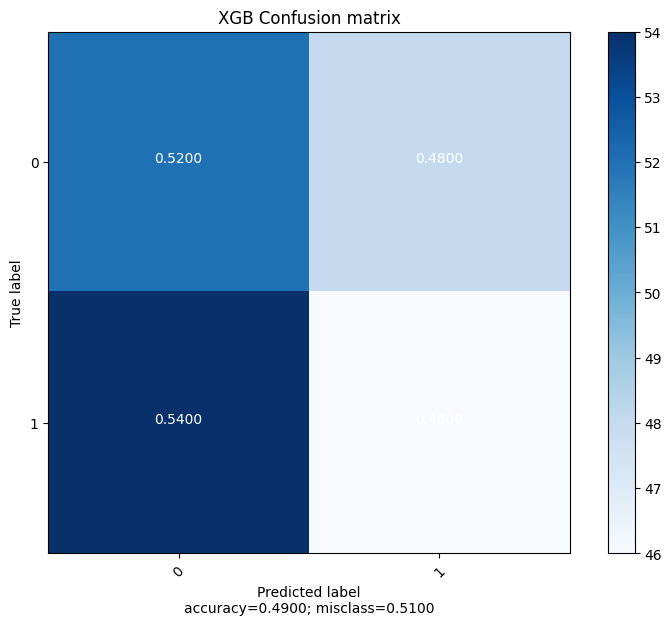

In [ ]:
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      target_names = class_names, 
                      title = 'XGB Confusion matrix')
plt.show()

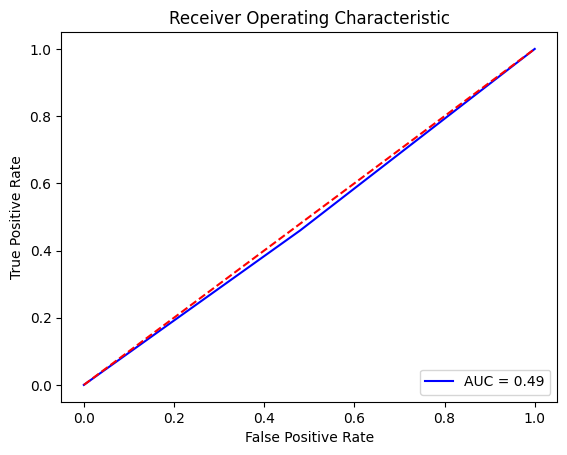

In [ ]:
buildROC(y_test, y_pred)

# PCA

In [124]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [125]:
PCA_ = PCA(n_components=10, svd_solver='full')
X_train = PCA_.fit_transform(X_train,y_train)
X_test = PCA_.transform(X_test)

# SVM Classification : sigmoid

In [126]:
from sklearn import svm
classifier = svm.SVC(kernel='linear') # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)

In [127]:
classifier.fit(X_train, y_train) # Then we train our model, with our balanced data train.

SVC(kernel='linear')

In [128]:
prediction_SVM_all = classifier.predict(X_test) #And finally, we predict our data test.

In [133]:
accuracy_score(y_test, prediction_SVM_all)

0.55

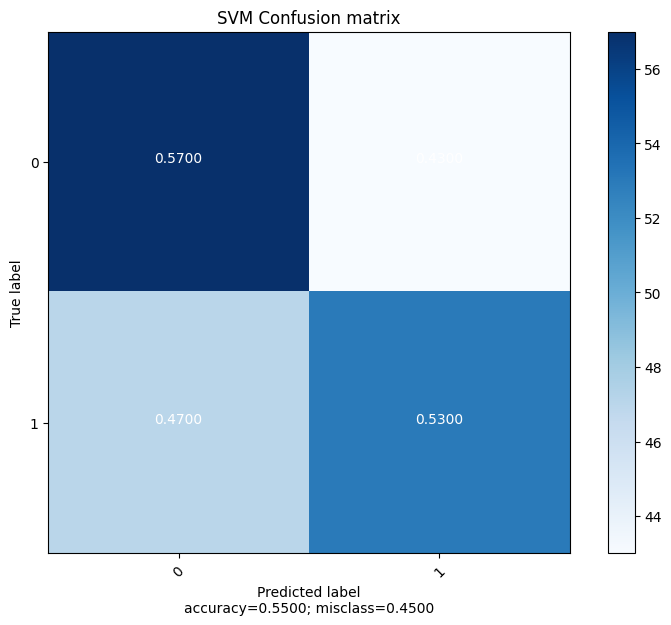

In [129]:
cm = confusion_matrix(y_test, prediction_SVM_all)
class_names = [0,1]
plot_confusion_matrix(cm, 
                      target_names = class_names, 
                      title = 'SVM Confusion matrix')

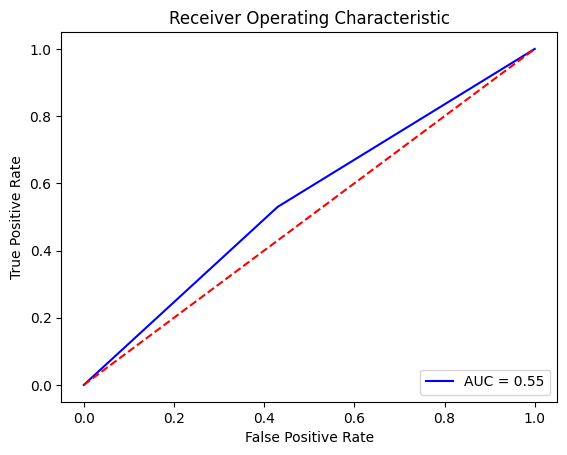

In [130]:
buildROC(y_test, prediction_SVM_all)

# RandomForestClassifier

In [134]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [137]:
accuracy_score(y_test, y_pred)

0.52

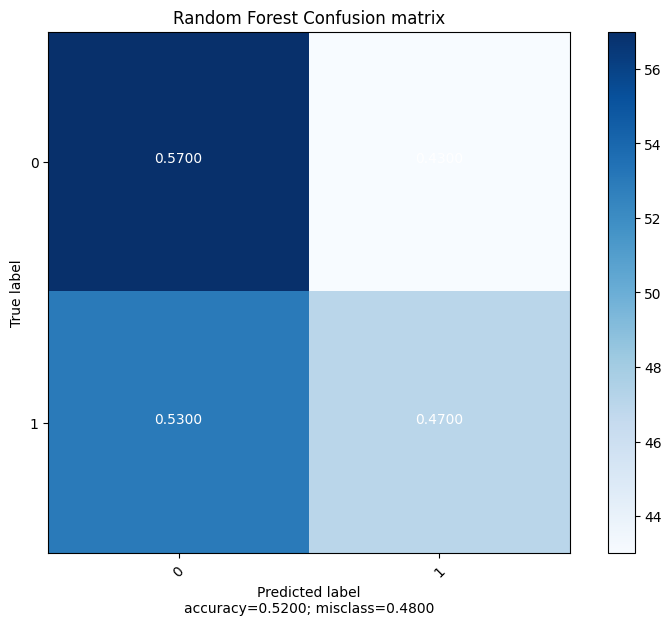

In [135]:
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plot_confusion_matrix(cm, 
                      target_names = class_names, 
                      title = 'Random Forest Confusion matrix')

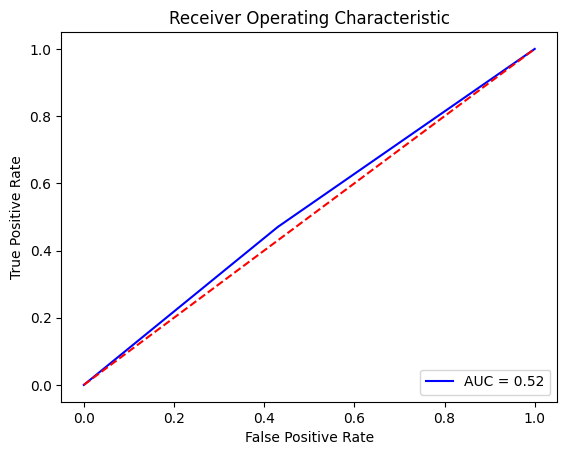

In [136]:
buildROC(y_test, y_pred)

# Markov Chain Monte Metropolis Hastings

In [170]:

#Defines whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))


def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,iterations,data,acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    x = param_init
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_model(x)    
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data) 
        if (acceptance_rule(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)

In [171]:
#The tranistion model defines how to move from sigma_current to sigma_new
transition_model = lambda x: np.random.normal(x,[0.05,5],(2,))

import math
def prior(w):
    if(w[0]<=0 or w[1] <=0):
        return 0
    else:
        return 1
    
def manual_log_lik_gamma(x,data):
    return np.sum((x[0]-1)*np.log(data) - (1/x[1])*data - x[0]*np.log(x[1]) - np.log(math.gamma(x[0])))
    
def log_lik_gamma(x,data):
    return np.sum(np.log(scipy.stats.gamma(a=x[0],scale=x[1],loc=0).pdf(data)))  

In [172]:
accepted, rejected = metropolis_hastings(manual_log_lik_gamma,prior,transition_model,[4, 10], 50000,x_train["Unit price"],acceptance) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


In [173]:
print(accepted.shape)

(3615, 2)


Starting from a=4, and b =10, the algorithm accepted 74 pairs of samples

Text(0.5, 1.0, 'Figure 12: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. Last 50 samples are shown.')

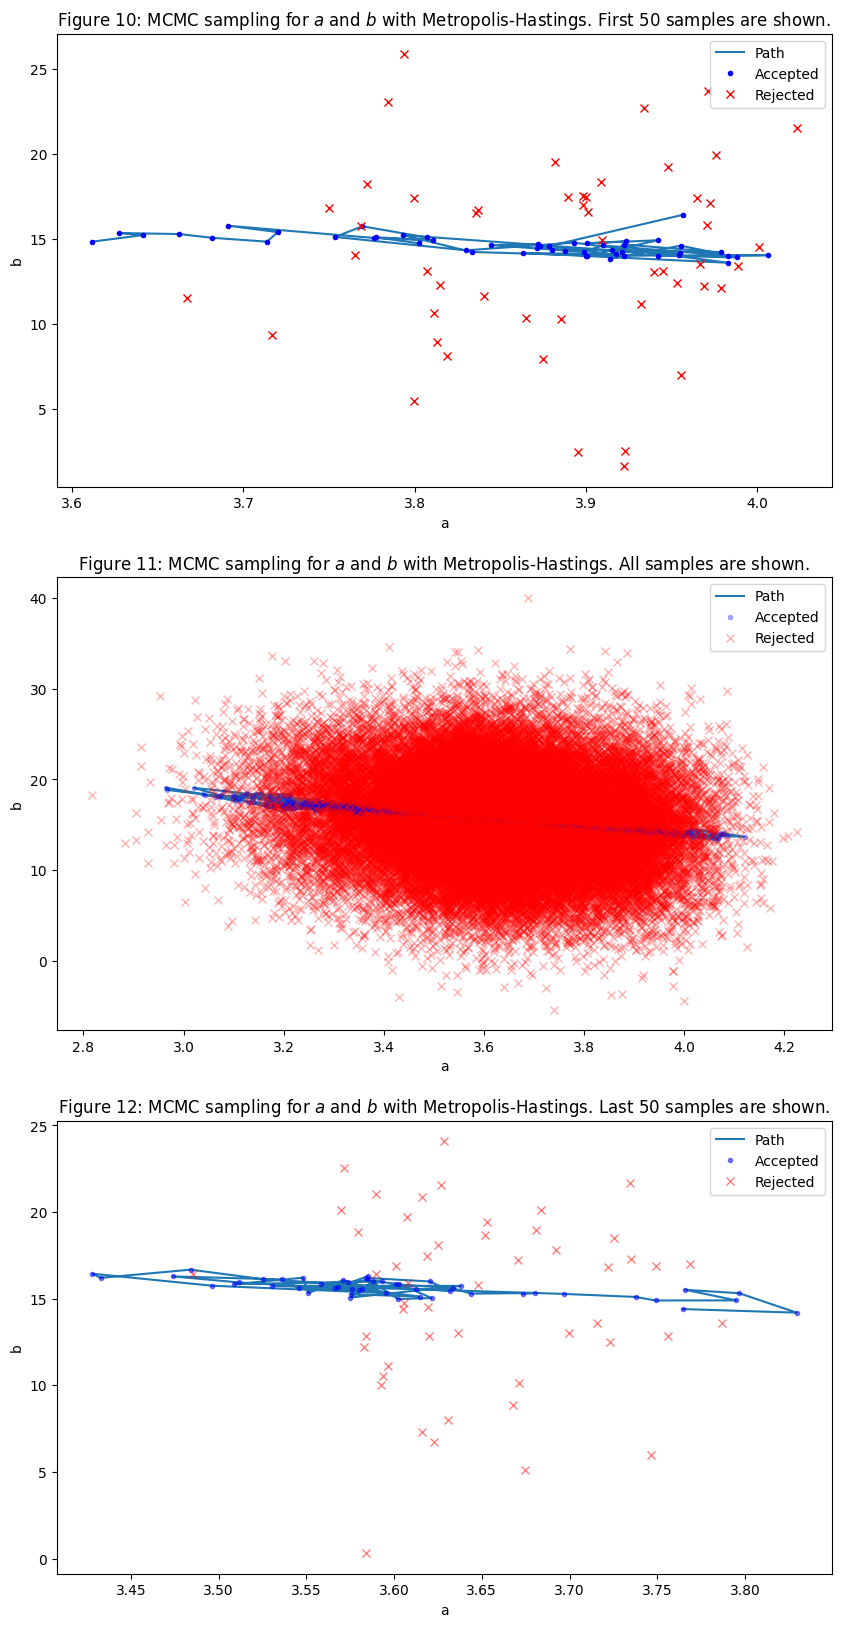

In [174]:
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(3,1,1)
ax.plot(accepted[:50,0], accepted[:50,1], label="Path")
ax.plot(accepted[:50,0], accepted[:50,1], 'b.', label='Accepted')
ax.plot(rejected[:50,0], rejected[:50,1], 'rx', label='Rejected')
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure 10: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. First 50 samples are shown.")  


ax = fig.add_subplot(3,1,2)
ax.plot(accepted[:,0], accepted[:,1], label="Path")
ax.plot(accepted[:,0], accepted[:,1], 'b.', label='Accepted',alpha=0.3)
ax.plot(rejected[:,0], rejected[:,1], 'rx', label='Rejected',alpha=0.3)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure 11: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. All samples are shown.") 

to_show=50
ax = fig.add_subplot(3,1,3)
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], label="Path")
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax.plot(rejected[-to_show:,0], rejected[-to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure 12: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. Last 50 samples are shown.") 

Run the algorithm with initial parameters and collect accepted and rejected samples

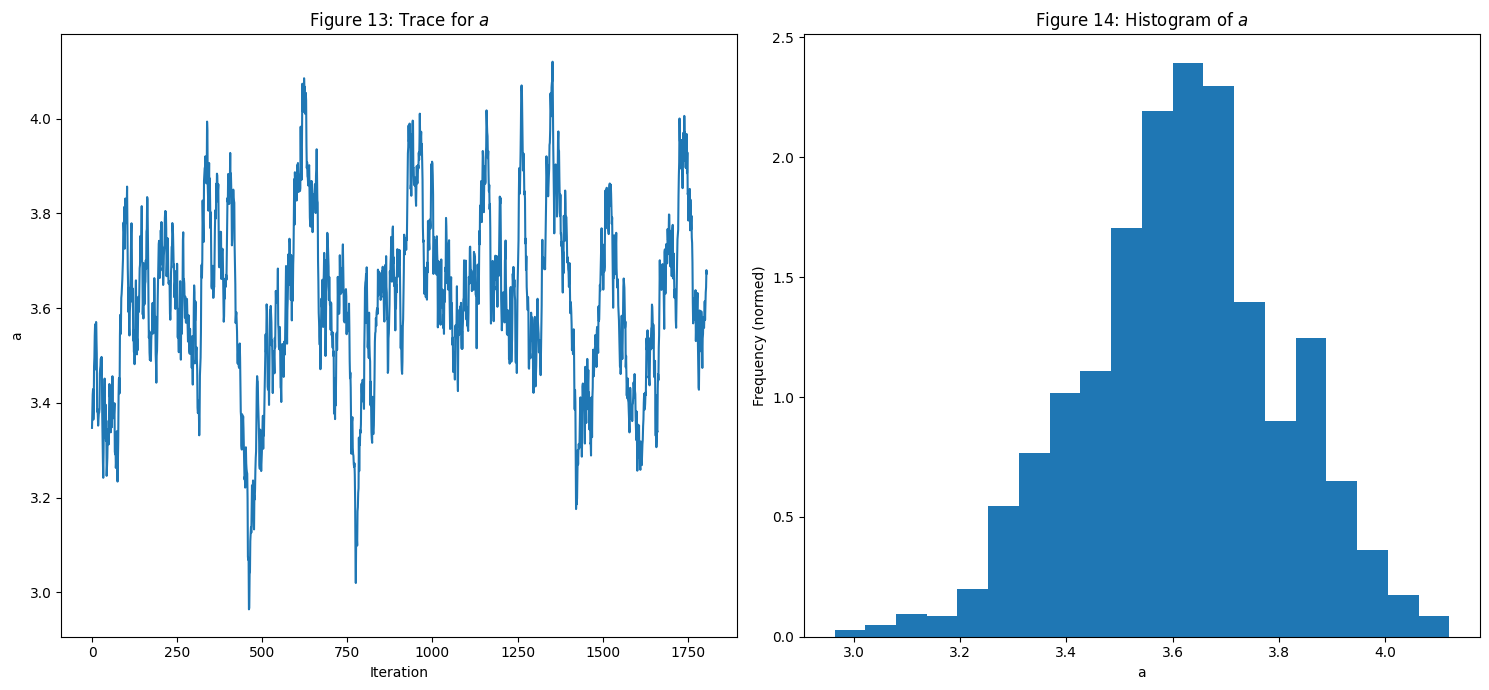

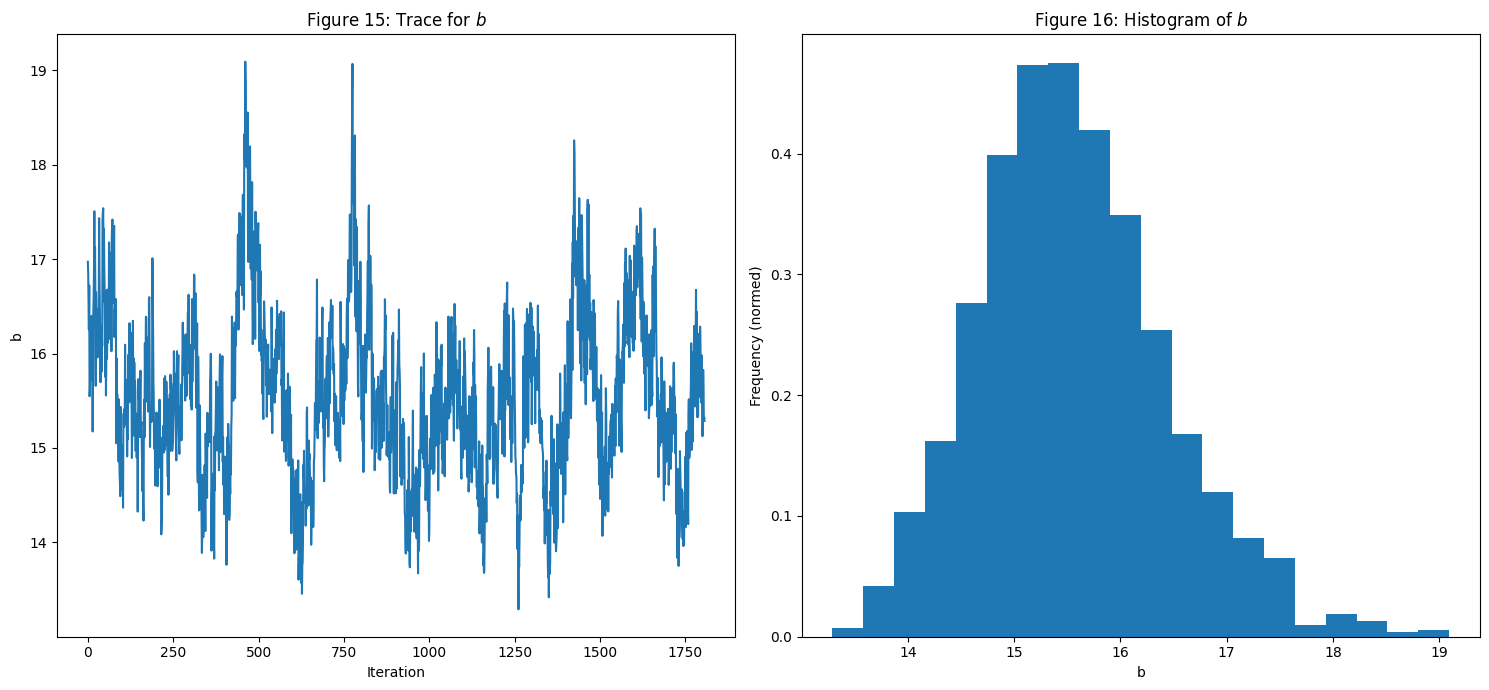

In [175]:
show=int(-0.5*accepted.shape[0])
hist_show=int(-0.50*accepted.shape[0])


fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,0])
ax.set_title("Figure 13: Trace for $a$")
ax.set_xlabel("Iteration")
ax.set_ylabel("a")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,0], bins=20, density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("a")
ax.set_title("Figure 14: Histogram of $a$")
fig.tight_layout()

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1])
ax.set_title("Figure 15: Trace for $b$")
ax.set_xlabel("Iteration")
ax.set_ylabel("b")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,1], bins=20, density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("b")
ax.set_title("Figure 16: Histogram of $b$")
fig.tight_layout()


### Prediction time
First, we average the last 50% of accepted samples of a and b, and we generate random individuals from a Γ distribution

3.616129625427841 15.549244400511952


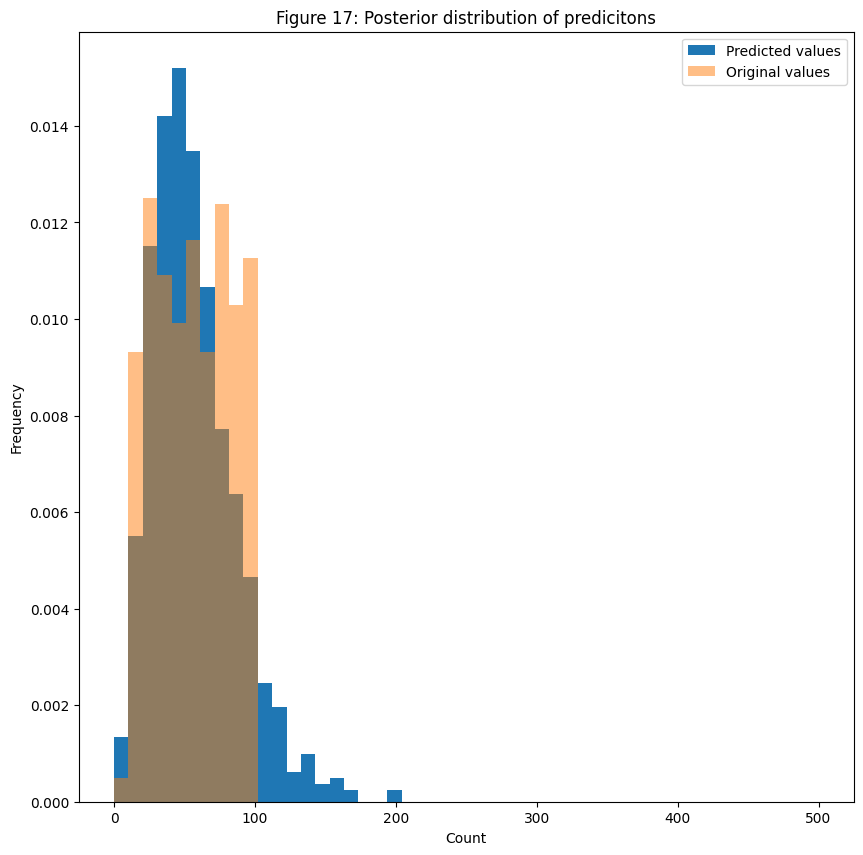

In [176]:
show=-int(0.5*accepted.shape[0])

mu=accepted[show:,0].mean()
sigma=accepted[show:,1].mean()
print(mu, sigma)
model = lambda t,mu,sigma:np.random.gamma(mu,sigma,t)
t=np.arange(x_train["Unit price"].shape[0])
observation_gen=model(t.shape[0],mu,sigma)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)



ax.hist( observation_gen,bins=np.linspace(0,500,50) ,density=True,label="Predicted values")
ax.hist( x_train["Unit price"],bins=np.linspace(0,500,50) ,alpha=0.5,density=True, label="Original values")
ax.set_xlabel("Count")
ax.set_ylabel("Frequency")
ax.set_title("Figure 17: Posterior distribution of predicitons")
ax.legend()

3.616129625427841 15.549244400511952


[(-0.1, 1.0), Text(0, 0.5, 'autocorrelation'), Text(0.5, 0, 'lag')]

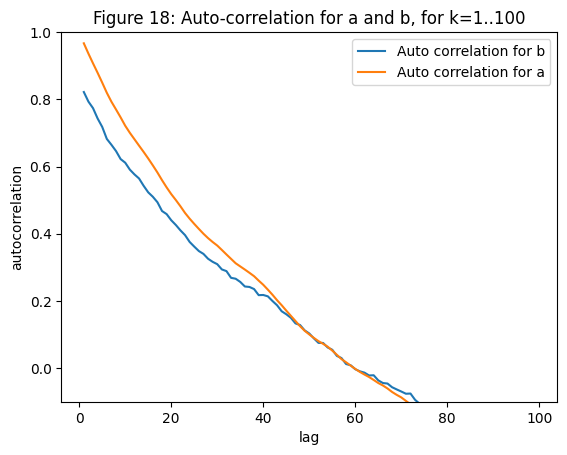

In [177]:
mean_acc_0=accepted[show:,0].mean()
mean_acc_1=accepted[show:,1].mean()
print(mean_acc_0,mean_acc_1)

lag=np.arange(1,100)
def autocorr(accepted,lag):
    num_0=0
    denom_0=0
    num_1=0
    denom_1=0
    for i in range(accepted.shape[0]-lag):
        num_0+=(accepted[i,0]-mean_acc_0)*(accepted[i+lag,0]-mean_acc_0)
        num_1+=(accepted[i,1]-mean_acc_1)*(accepted[i+lag,1]-mean_acc_1)
        denom_0+=(mean_acc_0-accepted[i,0])**2
        denom_1+=(mean_acc_1-accepted[i,1])**2
    rk_0=num_0/denom_0
    rk_1=num_1/denom_1
    return rk_0, rk_1


accepted_reversed=accepted[show:,:]
result=np.zeros((2,lag.shape[0]))
#print(lag)
for l in lag:
    result[:,l-1]=autocorr(accepted_reversed,l)

    ###Instead of writing an autocorrelation function, one could simply use thee autocorr function provided in pymc3    
#from pymc3.stats import autocorr

fig, ax = plt.subplots()
#ax.plot(lag, [autocorr(accepted[show:,1], l) for l in lags], label='auto b')
#ax.plot(lag, [autocorr(accepted[show:,0], l) for l in lags], label='auto a')
ax.plot(lag, result[1,:], label='Auto correlation for b')
ax.plot(lag, result[0,:], label='Auto correlation for a')
ax.legend(loc=0)
ax.set_title("Figure 18: Auto-correlation for a and b, for k=1..100")
ax.set(xlabel='lag', ylabel='autocorrelation', ylim=(-.1, 1))